1. [read data](#read-data)
2. [basic operations](#basic-operations)
3. [filtrations and wornings](#filtrations-and-wornings)
4. [Empty nan](#NaN-empty)
5. [variables types](#variables-types)
6. [quantile filtration](#quantile-filtration)
7. [pivot tables Categorical variables](#pivot-tables-Categorical-variables)
8. [pivot tables Continuous variables](#pivot-tables-Continuous-variables)
9. [group Categorical variables](#group-Categorical-variables)
10. [logic with varios columns](#logic-with-varios-columns)
11. [pivot table function](#pivot-table-function)
12. [Correlation and phik](#Correlation-and-phik)
13. [play data](#play-data)
14. [data visualisation](#data-visualisation)
15. [join s](#join-s)

импорты

In [3]:
import pandas as pd

# read data. 

Иногда может быть проблема с кодировкой из за кирилицы. тогда просто передаю аргумент encoding='cp1251'

In [4]:
df = pd.read_csv('aug_train.csv')
df

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
0,8949,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,NaN,NaN,1,36,1.0
1,29725,city_40,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15,50-99,Pvt Ltd,>4,47,0.0
2,11561,city_21,0.624,NaN,No relevent experience,Full time course,Graduate,STEM,5,NaN,NaN,never,83,0.0
3,33241,city_115,0.789,NaN,No relevent experience,NaN,Graduate,Business Degree,<1,NaN,Pvt Ltd,never,52,1.0
4,666,city_162,0.767,Male,Has relevent experience,no_enrollment,Masters,STEM,>20,50-99,Funded Startup,4,8,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19153,7386,city_173,0.878,Male,No relevent experience,no_enrollment,Graduate,Humanities,14,NaN,NaN,1,42,1.0
19154,31398,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,14,NaN,NaN,4,52,1.0
19155,24576,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,50-99,Pvt Ltd,4,44,0.0
19156,5756,city_65,0.802,Male,Has relevent experience,no_enrollment,High School,NaN,<1,500-999,Pvt Ltd,2,97,0.0


# basic operations

In [5]:
df.head() # по умолчанию 5 первых строк

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
0,8949,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,NaN,NaN,1,36,1.0
1,29725,city_40,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15,50-99,Pvt Ltd,>4,47,0.0
2,11561,city_21,0.624,NaN,No relevent experience,Full time course,Graduate,STEM,5,NaN,NaN,never,83,0.0
3,33241,city_115,0.789,NaN,No relevent experience,NaN,Graduate,Business Degree,<1,NaN,Pvt Ltd,never,52,1.0
4,666,city_162,0.767,Male,Has relevent experience,no_enrollment,Masters,STEM,>20,50-99,Funded Startup,4,8,0.0


In [6]:
df.tail() # 5 последних строк

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
19153,7386,city_173,0.878,Male,No relevent experience,no_enrollment,Graduate,Humanities,14,NaN,NaN,1,42,1.0
19154,31398,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,14,NaN,NaN,4,52,1.0
19155,24576,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,50-99,Pvt Ltd,4,44,0.0
19156,5756,city_65,0.802,Male,Has relevent experience,no_enrollment,High School,NaN,<1,500-999,Pvt Ltd,2,97,0.0
19157,23834,city_67,0.855,NaN,No relevent experience,no_enrollment,Primary School,NaN,2,NaN,NaN,1,127,0.0


In [7]:
df['city'] # объект series (столбец)

0        city_103
1         city_40
2         city_21
3        city_115
4        city_162
           ...   
19153    city_173
19154    city_103
19155    city_103
19156     city_65
19157     city_67
Name: city, Length: 19158, dtype: object

In [8]:
df[['city']]  # две квадратные скобки и будет датафрейм и сюда можно добавлять другие столбцы df[['city', 'city_development_index']]

,city
0,city_103
1,city_40
2,city_21
3,city_115
4,city_162
...,...
19153,city_173
19154,city_103
19155,city_103
19156,city_65


In [9]:
len(df) # количество строк

19158

In [10]:
# удаление столбца. axis отвечает за то как он будет искать то что удалить.  
# 0 - он будет искать в индексе к строкам, 1 - в названии столбцов
df.drop('city', axis=1)

,enrollee_id,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
0,8949,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,NaN,NaN,1,36,1.0
1,29725,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15,50-99,Pvt Ltd,>4,47,0.0
2,11561,0.624,NaN,No relevent experience,Full time course,Graduate,STEM,5,NaN,NaN,never,83,0.0
3,33241,0.789,NaN,No relevent experience,NaN,Graduate,Business Degree,<1,NaN,Pvt Ltd,never,52,1.0
4,666,0.767,Male,Has relevent experience,no_enrollment,Masters,STEM,>20,50-99,Funded Startup,4,8,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
19153,7386,0.878,Male,No relevent experience,no_enrollment,Graduate,Humanities,14,NaN,NaN,1,42,1.0
19154,31398,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,14,NaN,NaN,4,52,1.0
19155,24576,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,50-99,Pvt Ltd,4,44,0.0
19156,5756,0.802,Male,Has relevent experience,no_enrollment,High School,NaN,<1,500-999,Pvt Ltd,2,97,0.0


In [11]:
df # так видно что ничего не удалилось. что бы удалить. надо перезаписать датафрейм уже без столбца

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
0,8949,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,NaN,NaN,1,36,1.0
1,29725,city_40,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15,50-99,Pvt Ltd,>4,47,0.0
2,11561,city_21,0.624,NaN,No relevent experience,Full time course,Graduate,STEM,5,NaN,NaN,never,83,0.0
3,33241,city_115,0.789,NaN,No relevent experience,NaN,Graduate,Business Degree,<1,NaN,Pvt Ltd,never,52,1.0
4,666,city_162,0.767,Male,Has relevent experience,no_enrollment,Masters,STEM,>20,50-99,Funded Startup,4,8,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19153,7386,city_173,0.878,Male,No relevent experience,no_enrollment,Graduate,Humanities,14,NaN,NaN,1,42,1.0
19154,31398,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,14,NaN,NaN,4,52,1.0
19155,24576,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,50-99,Pvt Ltd,4,44,0.0
19156,5756,city_65,0.802,Male,Has relevent experience,no_enrollment,High School,NaN,<1,500-999,Pvt Ltd,2,97,0.0


In [12]:
df.columns # получить список всех столбцов

Index(['enrollee_id', 'city', 'city_development_index', 'gender',
       'relevent_experience', 'enrolled_university', 'education_level',
       'major_discipline', 'experience', 'company_size', 'company_type',
       'last_new_job', 'training_hours', 'target'],
      dtype='object')

In [13]:
# и теперь можно выбрать только те столбцы которые нужны
df[['enrollee_id', 'city', 'city_development_index', 'gender',
       'relevent_experience', 'enrolled_university', 'education_level',
       'major_discipline', 'experience', 'company_size', 'company_type',
       'last_new_job', 'training_hours', 'target']] 

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
0,8949,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,NaN,NaN,1,36,1.0
1,29725,city_40,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15,50-99,Pvt Ltd,>4,47,0.0
2,11561,city_21,0.624,NaN,No relevent experience,Full time course,Graduate,STEM,5,NaN,NaN,never,83,0.0
3,33241,city_115,0.789,NaN,No relevent experience,NaN,Graduate,Business Degree,<1,NaN,Pvt Ltd,never,52,1.0
4,666,city_162,0.767,Male,Has relevent experience,no_enrollment,Masters,STEM,>20,50-99,Funded Startup,4,8,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19153,7386,city_173,0.878,Male,No relevent experience,no_enrollment,Graduate,Humanities,14,NaN,NaN,1,42,1.0
19154,31398,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,14,NaN,NaN,4,52,1.0
19155,24576,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,50-99,Pvt Ltd,4,44,0.0
19156,5756,city_65,0.802,Male,Has relevent experience,no_enrollment,High School,NaN,<1,500-999,Pvt Ltd,2,97,0.0


In [14]:
# добавление нового столбца
df['new_col1'] = 1
df

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target,new_col1
0,8949,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,NaN,NaN,1,36,1.0,1
1,29725,city_40,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15,50-99,Pvt Ltd,>4,47,0.0,1
2,11561,city_21,0.624,NaN,No relevent experience,Full time course,Graduate,STEM,5,NaN,NaN,never,83,0.0,1
3,33241,city_115,0.789,NaN,No relevent experience,NaN,Graduate,Business Degree,<1,NaN,Pvt Ltd,never,52,1.0,1
4,666,city_162,0.767,Male,Has relevent experience,no_enrollment,Masters,STEM,>20,50-99,Funded Startup,4,8,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19153,7386,city_173,0.878,Male,No relevent experience,no_enrollment,Graduate,Humanities,14,NaN,NaN,1,42,1.0,1
19154,31398,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,14,NaN,NaN,4,52,1.0,1
19155,24576,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,50-99,Pvt Ltd,4,44,0.0,1
19156,5756,city_65,0.802,Male,Has relevent experience,no_enrollment,High School,NaN,<1,500-999,Pvt Ltd,2,97,0.0,1


In [15]:
# добавление нового столбца и так. с какой то операцией или формулой
df['new_col2'] = df['city_development_index'] / df['training_hours']
df

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target,new_col1,new_col2
0,8949,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,NaN,NaN,1,36,1.0,1,0.025556
1,29725,city_40,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15,50-99,Pvt Ltd,>4,47,0.0,1,0.016511
2,11561,city_21,0.624,NaN,No relevent experience,Full time course,Graduate,STEM,5,NaN,NaN,never,83,0.0,1,0.007518
3,33241,city_115,0.789,NaN,No relevent experience,NaN,Graduate,Business Degree,<1,NaN,Pvt Ltd,never,52,1.0,1,0.015173
4,666,city_162,0.767,Male,Has relevent experience,no_enrollment,Masters,STEM,>20,50-99,Funded Startup,4,8,0.0,1,0.095875
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19153,7386,city_173,0.878,Male,No relevent experience,no_enrollment,Graduate,Humanities,14,NaN,NaN,1,42,1.0,1,0.020905
19154,31398,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,14,NaN,NaN,4,52,1.0,1,0.017692
19155,24576,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,50-99,Pvt Ltd,4,44,0.0,1,0.020909
19156,5756,city_65,0.802,Male,Has relevent experience,no_enrollment,High School,NaN,<1,500-999,Pvt Ltd,2,97,0.0,1,0.008268


In [16]:
# делает действие на лету. и не добавляет прям в датафрейм столбец. не меняет исходный датафрейм
df.assign(new_col3=99)

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target,new_col1,new_col2,new_col3
0,8949,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,NaN,NaN,1,36,1.0,1,0.025556,99
1,29725,city_40,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15,50-99,Pvt Ltd,>4,47,0.0,1,0.016511,99
2,11561,city_21,0.624,NaN,No relevent experience,Full time course,Graduate,STEM,5,NaN,NaN,never,83,0.0,1,0.007518,99
3,33241,city_115,0.789,NaN,No relevent experience,NaN,Graduate,Business Degree,<1,NaN,Pvt Ltd,never,52,1.0,1,0.015173,99
4,666,city_162,0.767,Male,Has relevent experience,no_enrollment,Masters,STEM,>20,50-99,Funded Startup,4,8,0.0,1,0.095875,99
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19153,7386,city_173,0.878,Male,No relevent experience,no_enrollment,Graduate,Humanities,14,NaN,NaN,1,42,1.0,1,0.020905,99
19154,31398,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,14,NaN,NaN,4,52,1.0,1,0.017692,99
19155,24576,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,50-99,Pvt Ltd,4,44,0.0,1,0.020909,99
19156,5756,city_65,0.802,Male,Has relevent experience,no_enrollment,High School,NaN,<1,500-999,Pvt Ltd,2,97,0.0,1,0.008268,99


In [17]:
df

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target,new_col1,new_col2
0,8949,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,NaN,NaN,1,36,1.0,1,0.025556
1,29725,city_40,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15,50-99,Pvt Ltd,>4,47,0.0,1,0.016511
2,11561,city_21,0.624,NaN,No relevent experience,Full time course,Graduate,STEM,5,NaN,NaN,never,83,0.0,1,0.007518
3,33241,city_115,0.789,NaN,No relevent experience,NaN,Graduate,Business Degree,<1,NaN,Pvt Ltd,never,52,1.0,1,0.015173
4,666,city_162,0.767,Male,Has relevent experience,no_enrollment,Masters,STEM,>20,50-99,Funded Startup,4,8,0.0,1,0.095875
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19153,7386,city_173,0.878,Male,No relevent experience,no_enrollment,Graduate,Humanities,14,NaN,NaN,1,42,1.0,1,0.020905
19154,31398,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,14,NaN,NaN,4,52,1.0,1,0.017692
19155,24576,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,50-99,Pvt Ltd,4,44,0.0,1,0.020909
19156,5756,city_65,0.802,Male,Has relevent experience,no_enrollment,High School,NaN,<1,500-999,Pvt Ltd,2,97,0.0,1,0.008268


# filtrations and wornings

In [18]:
# например хочу зафильтровать тех у кого city_40
df[df['city'] == 'city_40'] # pandas natation

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target,new_col1,new_col2
1,29725,city_40,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15,50-99,Pvt Ltd,>4,47,0.0,1,0.016511
23,7041,city_40,0.776,Male,Has relevent experience,no_enrollment,Graduate,Humanities,<1,1000-4999,Pvt Ltd,1,65,0.0,1,0.011938
363,28229,city_40,0.776,Male,Has relevent experience,Part time course,Graduate,STEM,18,100-500,Funded Startup,>4,51,0.0,1,0.015216
461,18620,city_40,0.776,Male,Has relevent experience,Full time course,Graduate,STEM,14,1000-4999,Pvt Ltd,never,52,0.0,1,0.014923
827,1783,city_40,0.776,Male,Has relevent experience,no_enrollment,Masters,STEM,7,10000+,Pvt Ltd,1,56,0.0,1,0.013857
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18032,982,city_40,0.776,NaN,No relevent experience,Part time course,Graduate,STEM,3,NaN,NaN,NaN,34,1.0,1,0.022824
18061,11208,city_40,0.776,Male,No relevent experience,Full time course,Graduate,STEM,<1,NaN,NaN,1,127,1.0,1,0.006110
18191,157,city_40,0.776,Male,Has relevent experience,Full time course,Graduate,STEM,5,10000+,Pvt Ltd,never,42,0.0,1,0.018476
18650,26348,city_40,0.776,Male,Has relevent experience,no_enrollment,High School,NaN,13,50-99,Pvt Ltd,1,10,0.0,1,0.077600


In [19]:
df.query('city == "city_40"') # query

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target,new_col1,new_col2
1,29725,city_40,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15,50-99,Pvt Ltd,>4,47,0.0,1,0.016511
23,7041,city_40,0.776,Male,Has relevent experience,no_enrollment,Graduate,Humanities,<1,1000-4999,Pvt Ltd,1,65,0.0,1,0.011938
363,28229,city_40,0.776,Male,Has relevent experience,Part time course,Graduate,STEM,18,100-500,Funded Startup,>4,51,0.0,1,0.015216
461,18620,city_40,0.776,Male,Has relevent experience,Full time course,Graduate,STEM,14,1000-4999,Pvt Ltd,never,52,0.0,1,0.014923
827,1783,city_40,0.776,Male,Has relevent experience,no_enrollment,Masters,STEM,7,10000+,Pvt Ltd,1,56,0.0,1,0.013857
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18032,982,city_40,0.776,NaN,No relevent experience,Part time course,Graduate,STEM,3,NaN,NaN,NaN,34,1.0,1,0.022824
18061,11208,city_40,0.776,Male,No relevent experience,Full time course,Graduate,STEM,<1,NaN,NaN,1,127,1.0,1,0.006110
18191,157,city_40,0.776,Male,Has relevent experience,Full time course,Graduate,STEM,5,10000+,Pvt Ltd,never,42,0.0,1,0.018476
18650,26348,city_40,0.776,Male,Has relevent experience,no_enrollment,High School,NaN,13,50-99,Pvt Ltd,1,10,0.0,1,0.077600


In [20]:
# так же можно комбинировать условия выборки
df[(df['city'] == 'city_40') & (df['gender'] == 'Male')] # & это И

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target,new_col1,new_col2
1,29725,city_40,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15,50-99,Pvt Ltd,>4,47,0.0,1,0.016511
23,7041,city_40,0.776,Male,Has relevent experience,no_enrollment,Graduate,Humanities,<1,1000-4999,Pvt Ltd,1,65,0.0,1,0.011938
363,28229,city_40,0.776,Male,Has relevent experience,Part time course,Graduate,STEM,18,100-500,Funded Startup,>4,51,0.0,1,0.015216
461,18620,city_40,0.776,Male,Has relevent experience,Full time course,Graduate,STEM,14,1000-4999,Pvt Ltd,never,52,0.0,1,0.014923
827,1783,city_40,0.776,Male,Has relevent experience,no_enrollment,Masters,STEM,7,10000+,Pvt Ltd,1,56,0.0,1,0.013857
998,29671,city_40,0.776,Male,No relevent experience,Full time course,Graduate,STEM,9,NaN,NaN,1,50,0.0,1,0.015520
2916,21646,city_40,0.776,Male,No relevent experience,Full time course,High School,NaN,5,NaN,NaN,never,56,1.0,1,0.013857
3636,10085,city_40,0.776,Male,Has relevent experience,Full time course,Graduate,STEM,10,1000-4999,Pvt Ltd,1,104,0.0,1,0.007462
4251,2603,city_40,0.776,Male,Has relevent experience,no_enrollment,High School,NaN,3,50-99,Pvt Ltd,1,28,0.0,1,0.027714
4346,4051,city_40,0.776,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,1000-4999,Pvt Ltd,>4,20,0.0,1,0.038800


In [21]:
df.query('city == "city_40" and gender == "Male"') # query

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target,new_col1,new_col2
1,29725,city_40,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15,50-99,Pvt Ltd,>4,47,0.0,1,0.016511
23,7041,city_40,0.776,Male,Has relevent experience,no_enrollment,Graduate,Humanities,<1,1000-4999,Pvt Ltd,1,65,0.0,1,0.011938
363,28229,city_40,0.776,Male,Has relevent experience,Part time course,Graduate,STEM,18,100-500,Funded Startup,>4,51,0.0,1,0.015216
461,18620,city_40,0.776,Male,Has relevent experience,Full time course,Graduate,STEM,14,1000-4999,Pvt Ltd,never,52,0.0,1,0.014923
827,1783,city_40,0.776,Male,Has relevent experience,no_enrollment,Masters,STEM,7,10000+,Pvt Ltd,1,56,0.0,1,0.013857
998,29671,city_40,0.776,Male,No relevent experience,Full time course,Graduate,STEM,9,NaN,NaN,1,50,0.0,1,0.015520
2916,21646,city_40,0.776,Male,No relevent experience,Full time course,High School,NaN,5,NaN,NaN,never,56,1.0,1,0.013857
3636,10085,city_40,0.776,Male,Has relevent experience,Full time course,Graduate,STEM,10,1000-4999,Pvt Ltd,1,104,0.0,1,0.007462
4251,2603,city_40,0.776,Male,Has relevent experience,no_enrollment,High School,NaN,3,50-99,Pvt Ltd,1,28,0.0,1,0.027714
4346,4051,city_40,0.776,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,1000-4999,Pvt Ltd,>4,20,0.0,1,0.038800


In [22]:
# вот эти фильтрации нужны когда я хочу отбросить какие то данные и обычно надо сохранить это в какую то переменную
city_40_female = df[(df['city'] == 'city_40') & (df['gender'] == 'Female')]

In [23]:
city_40_female

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target,new_col1,new_col2
5625,18467,city_40,0.776,Female,Has relevent experience,no_enrollment,Masters,STEM,15,1000-4999,Pvt Ltd,2,25,0.0,1,0.031040
6385,11547,city_40,0.776,Female,Has relevent experience,no_enrollment,Graduate,STEM,2,10/49,Pvt Ltd,1,15,0.0,1,0.051733
8032,24409,city_40,0.776,Female,No relevent experience,no_enrollment,Masters,STEM,1,NaN,NaN,1,49,1.0,1,0.015837
8046,27349,city_40,0.776,Female,No relevent experience,no_enrollment,Masters,STEM,1,10/49,Pvt Ltd,never,19,1.0,1,0.040842
9923,6702,city_40,0.776,Female,No relevent experience,Full time course,Graduate,Other,1,100-500,NaN,1,34,0.0,1,0.022824
13871,17684,city_40,0.776,Female,Has relevent experience,no_enrollment,Graduate,STEM,5,50-99,Pvt Ltd,1,118,0.0,1,0.006576


In [24]:
city_40_female['new_col3'] = 1
city_40_female

/tmp/ipykernel_8075/3318889820.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  city_40_female['new_col3'] = 1


,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target,new_col1,new_col2,new_col3
5625,18467,city_40,0.776,Female,Has relevent experience,no_enrollment,Masters,STEM,15,1000-4999,Pvt Ltd,2,25,0.0,1,0.031040,1
6385,11547,city_40,0.776,Female,Has relevent experience,no_enrollment,Graduate,STEM,2,10/49,Pvt Ltd,1,15,0.0,1,0.051733,1
8032,24409,city_40,0.776,Female,No relevent experience,no_enrollment,Masters,STEM,1,NaN,NaN,1,49,1.0,1,0.015837,1
8046,27349,city_40,0.776,Female,No relevent experience,no_enrollment,Masters,STEM,1,10/49,Pvt Ltd,never,19,1.0,1,0.040842,1
9923,6702,city_40,0.776,Female,No relevent experience,Full time course,Graduate,Other,1,100-500,NaN,1,34,0.0,1,0.022824,1
13871,17684,city_40,0.776,Female,Has relevent experience,no_enrollment,Graduate,STEM,5,50-99,Pvt Ltd,1,118,0.0,1,0.006576,1


In [25]:
# так появились ворнинги. хотя столбец и записалася. это произошло потому что я делаю новый столбец слайсу датафрейма
# что бы этого избежать. всегда ставить copy() когда сохраняю кусок датафрейма
city_40_female = df[(df['city'] == 'city_40') & (df['gender'] == 'Female')].copy()
city_40_female

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target,new_col1,new_col2
5625,18467,city_40,0.776,Female,Has relevent experience,no_enrollment,Masters,STEM,15,1000-4999,Pvt Ltd,2,25,0.0,1,0.031040
6385,11547,city_40,0.776,Female,Has relevent experience,no_enrollment,Graduate,STEM,2,10/49,Pvt Ltd,1,15,0.0,1,0.051733
8032,24409,city_40,0.776,Female,No relevent experience,no_enrollment,Masters,STEM,1,NaN,NaN,1,49,1.0,1,0.015837
8046,27349,city_40,0.776,Female,No relevent experience,no_enrollment,Masters,STEM,1,10/49,Pvt Ltd,never,19,1.0,1,0.040842
9923,6702,city_40,0.776,Female,No relevent experience,Full time course,Graduate,Other,1,100-500,NaN,1,34,0.0,1,0.022824
13871,17684,city_40,0.776,Female,Has relevent experience,no_enrollment,Graduate,STEM,5,50-99,Pvt Ltd,1,118,0.0,1,0.006576


In [26]:
city_40_female['new_col3'] = 1
city_40_female

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target,new_col1,new_col2,new_col3
5625,18467,city_40,0.776,Female,Has relevent experience,no_enrollment,Masters,STEM,15,1000-4999,Pvt Ltd,2,25,0.0,1,0.031040,1
6385,11547,city_40,0.776,Female,Has relevent experience,no_enrollment,Graduate,STEM,2,10/49,Pvt Ltd,1,15,0.0,1,0.051733,1
8032,24409,city_40,0.776,Female,No relevent experience,no_enrollment,Masters,STEM,1,NaN,NaN,1,49,1.0,1,0.015837,1
8046,27349,city_40,0.776,Female,No relevent experience,no_enrollment,Masters,STEM,1,10/49,Pvt Ltd,never,19,1.0,1,0.040842,1
9923,6702,city_40,0.776,Female,No relevent experience,Full time course,Graduate,Other,1,100-500,NaN,1,34,0.0,1,0.022824,1
13871,17684,city_40,0.776,Female,Has relevent experience,no_enrollment,Graduate,STEM,5,50-99,Pvt Ltd,1,118,0.0,1,0.006576,1


# NaN empty

In [27]:
df # тут видно иногда NaN это то где данные не указаны.

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target,new_col1,new_col2
0,8949,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,NaN,NaN,1,36,1.0,1,0.025556
1,29725,city_40,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15,50-99,Pvt Ltd,>4,47,0.0,1,0.016511
2,11561,city_21,0.624,NaN,No relevent experience,Full time course,Graduate,STEM,5,NaN,NaN,never,83,0.0,1,0.007518
3,33241,city_115,0.789,NaN,No relevent experience,NaN,Graduate,Business Degree,<1,NaN,Pvt Ltd,never,52,1.0,1,0.015173
4,666,city_162,0.767,Male,Has relevent experience,no_enrollment,Masters,STEM,>20,50-99,Funded Startup,4,8,0.0,1,0.095875
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19153,7386,city_173,0.878,Male,No relevent experience,no_enrollment,Graduate,Humanities,14,NaN,NaN,1,42,1.0,1,0.020905
19154,31398,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,14,NaN,NaN,4,52,1.0,1,0.017692
19155,24576,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,50-99,Pvt Ltd,4,44,0.0,1,0.020909
19156,5756,city_65,0.802,Male,Has relevent experience,no_enrollment,High School,NaN,<1,500-999,Pvt Ltd,2,97,0.0,1,0.008268


In [28]:
# в этой таблице будет видно процент того сколько там NaN по каждому столбцу. что бы прям увидеть процент 
# надо умножить на 100. но и так видно. все что после 0 это процент
# .sort_values(ascending=False) сортировка по убыванию
df.isna().mean().sort_values(ascending=False)

company_type              0.320493
company_size              0.309949
gender                    0.235306
major_discipline          0.146832
education_level           0.024011
last_new_job              0.022080
enrolled_university       0.020148
experience                0.003393
enrollee_id               0.000000
city                      0.000000
city_development_index    0.000000
relevent_experience       0.000000
training_hours            0.000000
target                    0.000000
new_col1                  0.000000
new_col2                  0.000000
dtype: float64

что делать с пропусками. Ничего. оставляю их. просто смотрю, так как я сейчас просто анализирую датафрейм...
а заполняю их, тогда когда это нужно. Например для модели машинного обучения

In [27]:
df.info() # тоже можно увидеть сколько пропусков. Но так не видно процент

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19158 entries, 0 to 19157
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   enrollee_id             19158 non-null  int64  
 1   city                    19158 non-null  object 
 2   city_development_index  19158 non-null  float64
 3   gender                  14650 non-null  object 
 4   relevent_experience     19158 non-null  object 
 5   enrolled_university     18772 non-null  object 
 6   education_level         18698 non-null  object 
 7   major_discipline        16345 non-null  object 
 8   experience              19093 non-null  object 
 9   company_size            13220 non-null  object 
 10  company_type            13018 non-null  object 
 11  last_new_job            18735 non-null  object 
 12  training_hours          19158 non-null  int64  
 13  target                  19158 non-null  float64
 14  new_col1                19158 non-null

In [28]:
df.dtypes

enrollee_id                 int64
city                       object
city_development_index    float64
gender                     object
relevent_experience        object
enrolled_university        object
education_level            object
major_discipline           object
experience                 object
company_size               object
company_type               object
last_new_job               object
training_hours              int64
target                    float64
new_col1                    int64
new_col2                  float64
dtype: object

# variables types

непрерывные и категориальные

непрерывные например как датафрейм city_development_index. Она может принимать разные значения в каком то проммежутке.

категориальная это та которая может принимать определенные значения. Например пол

In [29]:
df

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target,new_col1,new_col2
0,8949,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,NaN,NaN,1,36,1.0,1,0.025556
1,29725,city_40,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15,50-99,Pvt Ltd,>4,47,0.0,1,0.016511
2,11561,city_21,0.624,NaN,No relevent experience,Full time course,Graduate,STEM,5,NaN,NaN,never,83,0.0,1,0.007518
3,33241,city_115,0.789,NaN,No relevent experience,NaN,Graduate,Business Degree,<1,NaN,Pvt Ltd,never,52,1.0,1,0.015173
4,666,city_162,0.767,Male,Has relevent experience,no_enrollment,Masters,STEM,>20,50-99,Funded Startup,4,8,0.0,1,0.095875
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19153,7386,city_173,0.878,Male,No relevent experience,no_enrollment,Graduate,Humanities,14,NaN,NaN,1,42,1.0,1,0.020905
19154,31398,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,14,NaN,NaN,4,52,1.0,1,0.017692
19155,24576,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,50-99,Pvt Ltd,4,44,0.0,1,0.020909
19156,5756,city_65,0.802,Male,Has relevent experience,no_enrollment,High School,NaN,<1,500-999,Pvt Ltd,2,97,0.0,1,0.008268


<Axes: >

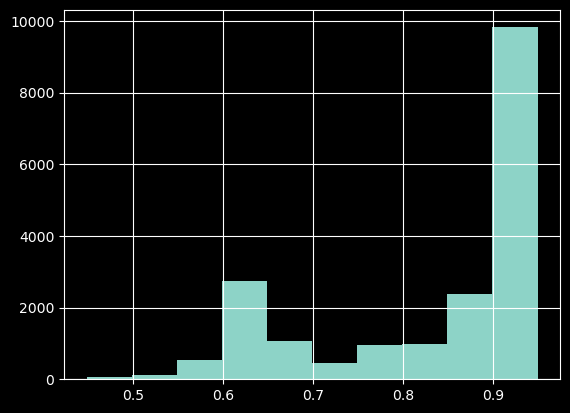

In [105]:
# для непрерывной переменной. смотрим на распределние на гистограму
# и так я вижу гистграмму где видно распределение этой переменной
# гистограма разбивает данные на 10 равных отрезков и смотрит сколько на каждый отрезок попало людей
# по игрику идет count

import matplotlib.pyplot as plt
import numpy as np

plt.style.use('dark_background')
df['city_development_index'].hist()

In [31]:
# так выведутся переменные которые имеют числовой тип данных(потенциально непрерывные переменные)
df.describe()  

,enrollee_id,city_development_index,training_hours,target,new_col1,new_col2
count,19158.000000,19158.000000,19158.000000,19158.000000,19158.0,19158.000000
mean,16875.358179,0.828848,65.366896,0.249348,1.0,0.033439
std,9616.292592,0.123362,60.058462,0.432647,0.0,0.051378
min,1.000000,0.448000,1.000000,0.000000,1.0,0.001516
25%,8554.250000,0.740000,23.000000,0.000000,1.0,0.009246
50%,16982.500000,0.903000,47.000000,0.000000,1.0,0.017526
75%,25169.750000,0.920000,88.000000,0.000000,1.0,0.035625
max,33380.000000,0.949000,336.000000,1.000000,1.0,0.926000


значение 0.740000 в строке 25% для столбца city_development_index, означает, что если отсортировать все значения этого столбца по возрастанию, 25% всех значений будут меньше или равны 0.740000. То есть четверть всех городов имеют показатель city_development_index, который не превышает 0.74.

In [32]:
# с категориально еще проще. там можно посмотреть только количество того или иного значения
df['gender'].value_counts() # вот так я не вижу пропуски

gender
Male      13221
Female     1238
Other       191
Name: count, dtype: int64

In [33]:
df['gender'].value_counts(dropna=False) # так я вижу пропуски. так как по умолчанию пропуски игнорятся

gender
Male      13221
NaN        4508
Female     1238
Other       191
Name: count, dtype: int64

# quantile filtration

иногда нужно откинуть либо очень большие данные из переменной либо очень маленькие. Либо и так и так... выбросы короче. Зависит от задач. Например выкинуть какие то значения для машинного обучения. ЧТо бы было лучше качество у машинного обучения
квантиль этто тоже что и процентиль. но там можно брать любой процент а не только 25, 50, 75

означает, что если отсортировать все значения этого столбца по возрастанию, 25% всех значений будут меньше или равны 0.740000. То есть четверть всех городов имеют показатель city_development_index, который не превышает 0.74.

In [30]:
q = df['city_development_index'].quantile(0.25) # тоже что и в describe где 25 процентов
q

0.74

In [31]:
df[df['city_development_index'] < q] # 25 процентов датасета

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target,new_col1,new_col2
2,11561,city_21,0.624,NaN,No relevent experience,Full time course,Graduate,STEM,5,NaN,NaN,never,83,0.0,1,0.007518
10,29452,city_21,0.624,NaN,No relevent experience,Full time course,High School,NaN,2,NaN,NaN,never,32,1.0,1,0.019500
13,5826,city_21,0.624,Male,No relevent experience,NaN,NaN,NaN,2,NaN,NaN,never,24,0.0,1,0.026000
14,8722,city_21,0.624,NaN,No relevent experience,Full time course,High School,NaN,5,NaN,NaN,never,26,0.0,1,0.024000
17,5764,city_21,0.624,NaN,Has relevent experience,no_enrollment,Graduate,STEM,2,5000-9999,Pvt Ltd,2,7,0.0,1,0.089143
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19144,17191,city_21,0.624,NaN,No relevent experience,Full time course,Graduate,STEM,4,NaN,NaN,never,48,1.0,1,0.013000
19145,155,city_44,0.725,NaN,No relevent experience,Full time course,Graduate,STEM,5,NaN,Pvt Ltd,never,190,0.0,1,0.003816
19147,21319,city_21,0.624,Male,No relevent experience,Full time course,Graduate,STEM,1,100-500,Pvt Ltd,1,52,1.0,1,0.012000
19148,9212,city_21,0.624,NaN,Has relevent experience,no_enrollment,Masters,STEM,3,100-500,Pvt Ltd,3,40,1.0,1,0.015600


In [32]:
len(df[df['city_development_index'] < q]) / len(df)

0.24903434596513205

так я могу фильтровать данные теперь.

In [33]:
# 5 % значение, ниже которого находится 5% всех данных
q = df['city_development_index'].quantile(0.05) 

<Axes: >

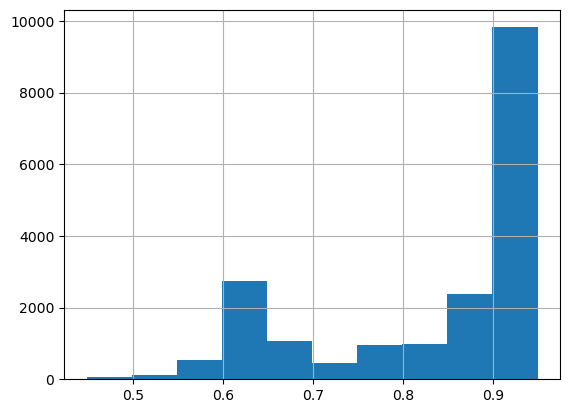

In [34]:
df['city_development_index'].hist()

Затем отфильтровываю строки, оставляя только те значения, которые больше или равны этому перцентилю(5 процентов).

Гистограмма, созданная для такого отфильтрованного набора данных, будет показывать распределение оставшихся 95% данных (значения, которые больше или равны 5% перцентилю).

Эта гистограмма будет выглядеть по-другому, потому что она отображает только часть данных, исключив нижние 5% значений, которые могли бы быть экстремально низкими или выбросами.

<Axes: >

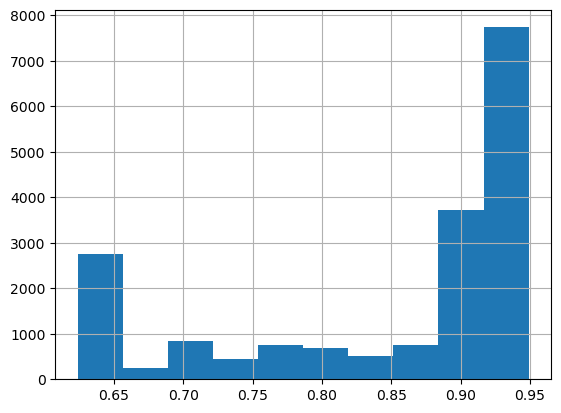

In [35]:
# исключает нижние 5% значений
df[df['city_development_index'] >= q ]['city_development_index'].hist() 

<Axes: >

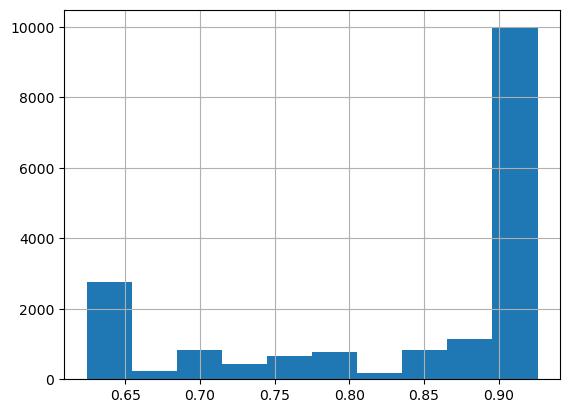

In [36]:
# 5-й перцентиль. Это значение, ниже которого находится 5% всех данных в столбце city_development_index.
q1 = df['city_development_index'].quantile(0.05)


# 95-й перцентиль. Это значение, ниже которого находится 95% всех данных. Иными словами, 
# выше этого значения остаётся только верхние 5% данных.
q2 = df['city_development_index'].quantile(0.95)


# Здесь выбираются все строки, где значение city_development_index находится между q1 и q2, 
# то есть между 5% и 95% перцентилями.
# отбрасываю нижние 5% и верхние 5% значений, и оставляю только средние 90% данных
df[df['city_development_index'].between(q1, q2)]['city_development_index'].hist() 


# pivot tables Categorical variables

самый главный инструмент для анализа это сводные таблицы. Буду анализировать таргет.
target явлеятеся хочет ли датасайентист сменить работу
1 хочет 
0 не хочет

In [37]:
# процент тех кто хочет сменить работу. можно просто посмотерть среднее в этом случае
df['target'].mean(), df['target'].mean() * 100 # 25 процентов хочет сменить работу

(0.24934753105752167, 24.934753105752165)

теперь можно  посмотреть как разные переменные влияют на этот таргет. как влияет город, пол, итд
можно например сравнить какой процент мужчин и какой процент женщин хочет сменить работу

In [38]:
# проще всего сделать сводную таблицу с помощью groupby(). это будет не совсем сводник. это группироква

# Сначала данные в DataFrame группируются по значению столбца 'gender'. Это означает, 
# что создаются две группы: одна для мужчин и одна для женщин и одна для other

# После группировки для каждой из этих групп вычисляется среднее значение столбца 'target'.
# Столбец 'target' принимает значения 0 и 1, где 1 означает, что человек хочет сменить работу, а 0 — что не хочет.
# Среднее значение (mean) рассчитывается как сумма всех значений 'target' в группе, 
# делённая на количество записей в этой группе.
df.groupby('gender')['target'].mean()

gender
Female    0.263328
Male      0.227819
Other     0.261780
Name: target, dtype: float64

In [39]:
df.groupby('gender')['target'].agg(['count', 'mean'])

,count,mean
gender,,
Female,1238,0.263328
Male,13221,0.227819
Other,191,0.261780


In [40]:
df.pivot_table(values='target', index='gender', aggfunc='mean')

,target
gender,
Female,0.263328
Male,0.227819
Other,0.261780


тут можно стать жертвой того что есть пропуски в данных

In [41]:
t = df.groupby('gender')['target'].agg(['count', 'mean'])
t['count'].sum() # это сумма должна в иделае ровнятся количеству строк в датафрейме. но так как есть NaN она меньше

14650

после агрегации не должно быть потерь!!!

поэтому  использую dropna=False что бы пропуски тоже отобразились

In [42]:
t = df.groupby('gender', dropna=False)['target'].agg(['count', 'mean'])
t

,count,mean
gender,,
Female,1238,0.263328
Male,13221,0.227819
Other,191,0.261780
NaN,4508,0.308119


In [43]:
t['count'].sum()

19158

In [44]:
df.groupby('education_level', dropna=False)['target'].agg(['count', 'mean'])

,count,mean
education_level,,
Graduate,11598,0.279790
High School,2017,0.195340
Masters,4361,0.214400
Phd,414,0.140097
Primary School,308,0.133117
NaN,460,0.226087


<Axes: xlabel='education_level'>

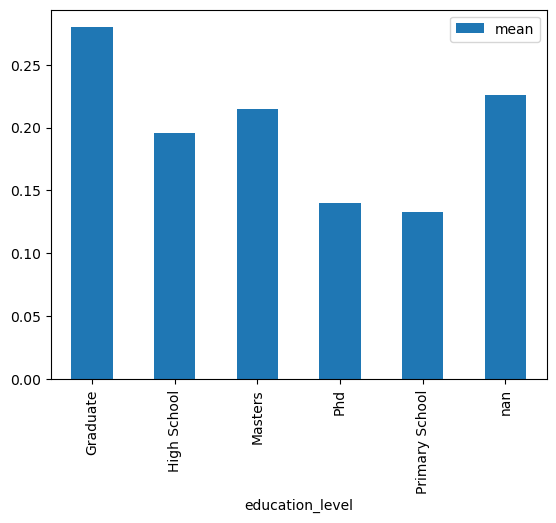

In [45]:
# и уже можно построить таблицу
df.groupby('education_level', dropna=False)['target'].agg(['mean']).plot(kind="bar")

<Axes: xlabel='education_level'>

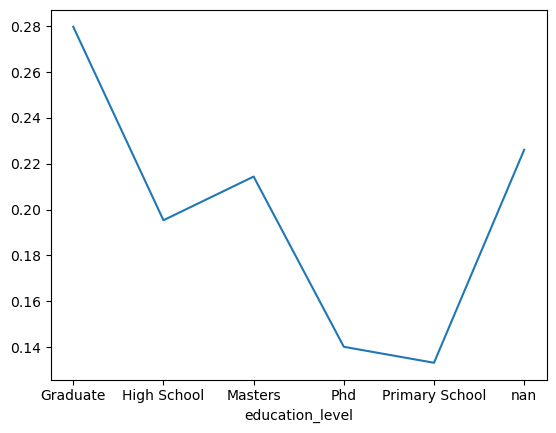

In [46]:
# и уже можно построить таблицу
df.groupby('education_level', dropna=False)['target'].mean().plot()

# pivot tables Continuous variables

In [47]:
df

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target,new_col1,new_col2
0,8949,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,NaN,NaN,1,36,1.0,1,0.025556
1,29725,city_40,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15,50-99,Pvt Ltd,>4,47,0.0,1,0.016511
2,11561,city_21,0.624,NaN,No relevent experience,Full time course,Graduate,STEM,5,NaN,NaN,never,83,0.0,1,0.007518
3,33241,city_115,0.789,NaN,No relevent experience,NaN,Graduate,Business Degree,<1,NaN,Pvt Ltd,never,52,1.0,1,0.015173
4,666,city_162,0.767,Male,Has relevent experience,no_enrollment,Masters,STEM,>20,50-99,Funded Startup,4,8,0.0,1,0.095875
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19153,7386,city_173,0.878,Male,No relevent experience,no_enrollment,Graduate,Humanities,14,NaN,NaN,1,42,1.0,1,0.020905
19154,31398,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,14,NaN,NaN,4,52,1.0,1,0.017692
19155,24576,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,50-99,Pvt Ltd,4,44,0.0,1,0.020909
19156,5756,city_65,0.802,Male,Has relevent experience,no_enrollment,High School,NaN,<1,500-999,Pvt Ltd,2,97,0.0,1,0.008268


In [48]:
df.groupby('city_development_index', dropna=False)['target'].agg(['count', 'mean'])

,count,mean
city_development_index,,
0.448,17,0.647059
0.479,28,0.535714
0.487,5,0.800000
0.493,13,0.538462
0.512,5,0.600000
...,...,...
0.924,301,0.093023
0.925,171,0.140351
0.926,1336,0.099551


если для категориальных можно сразу строить сводник. то для непрерывных нужно сделать еще один шаг
так как получилось много строк. и эта таблица не читаема. И поэтому надо сначала побить непрерывную переменную на интервалы

In [49]:
pd.cut(df['city_development_index'], 5) # разбиваю на 5 кусков равных по длинне

0        (0.849, 0.949]
1        (0.749, 0.849]
2        (0.548, 0.648]
3        (0.749, 0.849]
4        (0.749, 0.849]
              ...      
19153    (0.849, 0.949]
19154    (0.849, 0.949]
19155    (0.849, 0.949]
19156    (0.749, 0.849]
19157    (0.849, 0.949]
Name: city_development_index, Length: 19158, dtype: category
Categories (5, interval[float64, right]): [(0.447, 0.548] < (0.548, 0.648] < (0.648, 0.749] < (0.749, 0.849] < (0.849, 0.949]]

In [50]:
# сохраняю разбивку в столбец в датафрейм
df['city_development_index_group'] = pd.cut(df['city_development_index'], 5)
df

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target,new_col1,new_col2,city_development_index_group
0,8949,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,NaN,NaN,1,36,1.0,1,0.025556,"(0.849, 0.949]"
1,29725,city_40,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15,50-99,Pvt Ltd,>4,47,0.0,1,0.016511,"(0.749, 0.849]"
2,11561,city_21,0.624,NaN,No relevent experience,Full time course,Graduate,STEM,5,NaN,NaN,never,83,0.0,1,0.007518,"(0.548, 0.648]"
3,33241,city_115,0.789,NaN,No relevent experience,NaN,Graduate,Business Degree,<1,NaN,Pvt Ltd,never,52,1.0,1,0.015173,"(0.749, 0.849]"
4,666,city_162,0.767,Male,Has relevent experience,no_enrollment,Masters,STEM,>20,50-99,Funded Startup,4,8,0.0,1,0.095875,"(0.749, 0.849]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19153,7386,city_173,0.878,Male,No relevent experience,no_enrollment,Graduate,Humanities,14,NaN,NaN,1,42,1.0,1,0.020905,"(0.849, 0.949]"
19154,31398,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,14,NaN,NaN,4,52,1.0,1,0.017692,"(0.849, 0.949]"
19155,24576,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,50-99,Pvt Ltd,4,44,0.0,1,0.020909,"(0.849, 0.949]"
19156,5756,city_65,0.802,Male,Has relevent experience,no_enrollment,High School,NaN,<1,500-999,Pvt Ltd,2,97,0.0,1,0.008268,"(0.749, 0.849]"


In [51]:
# и теперь использую новый столбец для сводной таблицы
df.groupby('city_development_index_group', dropna=False)['target'].agg(['count', 'mean'])

/tmp/ipykernel_8075/1972467131.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby('city_development_index_group', dropna=False)['target'].agg(['count', 'mean'])


,count,mean
city_development_index_group,,
"(0.447, 0.548]",178,0.578652
"(0.548, 0.648]",3297,0.582651
"(0.648, 0.749]",1529,0.273381
"(0.749, 0.849]",1949,0.194459
"(0.849, 0.949]",12205,0.160262


Если хочу, чтобы в вашей сводной таблице были только фактически присутствующие категории — использую observed=True.

Если вы хочу видеть все возможные категории (даже если они отсутствуют в данных), использую observed=False.

по умолчанию раньше всегда было observed=False.

In [52]:
df.groupby('city_development_index_group', dropna=False, observed=False)['target'].agg(['count', 'mean'])

,count,mean
city_development_index_group,,
"(0.447, 0.548]",178,0.578652
"(0.548, 0.648]",3297,0.582651
"(0.648, 0.749]",1529,0.273381
"(0.749, 0.849]",1949,0.194459
"(0.849, 0.949]",12205,0.160262


такая группирока выше может не всегда устраивать. Иногда надо сделать например группироку равномерную по количеству людей. дляя этого ессть не cut а qcat

In [95]:
df['city_development_index_group_q'] = pd.qcut(df['city_development_index'], 5)
df
# и тут может бытть проблема если очень много повторяющихся значений. так  как больше половины находится в одной категории

ValueError: Bin edges must be unique: array([0.448, 0.691, 0.878, 0.92 , 0.92 , 0.949]).
You can drop duplicate edges by setting the 'duplicates' kwarg

In [96]:
# использую duplicates='drop'
df['city_development_index_group_q'] = pd.qcut(df['city_development_index'], 5, duplicates='drop')
df

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,...,last_new_job,training_hours,target,new_col1,new_col2,city_development_index_group,city_development_index_group_custom,new_education_level,new_training_hours,city_development_index_group_q
0,8949,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,NaN,...,1,36,1.0,1,0.025556,"(0.849, 0.949]","(0.5, inf]",Graduate,36,"(0.878, 0.92]"
1,29725,city_40,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15,50-99,...,>4,47,0.0,1,0.016511,"(0.749, 0.849]","(0.5, inf]",Graduate,47,"(0.691, 0.878]"
2,11561,city_21,0.624,no_info,No relevent experience,Full time course,Graduate,STEM,5,NaN,...,never,83,0.0,1,0.007518,"(0.548, 0.648]","(0.5, inf]",Graduate,83,"(0.447, 0.691]"
3,33241,city_115,0.789,no_info,No relevent experience,NaN,Graduate,Business Degree,<1,NaN,...,never,52,1.0,1,0.015173,"(0.749, 0.849]","(0.5, inf]",Graduate,52,"(0.691, 0.878]"
4,666,city_162,0.767,Male,Has relevent experience,no_enrollment,Masters,STEM,>20,50-99,...,4,8,0.0,1,0.095875,"(0.749, 0.849]","(0.5, inf]",Masters_and_phd,8,"(0.691, 0.878]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19153,7386,city_173,0.878,Male,No relevent experience,no_enrollment,Graduate,Humanities,14,NaN,...,1,42,1.0,1,0.020905,"(0.849, 0.949]","(0.5, inf]",Graduate,42,"(0.691, 0.878]"
19154,31398,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,14,NaN,...,4,52,1.0,1,0.017692,"(0.849, 0.949]","(0.5, inf]",Graduate,52,"(0.878, 0.92]"
19155,24576,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,50-99,...,4,44,0.0,1,0.020909,"(0.849, 0.949]","(0.5, inf]",Graduate,44,"(0.878, 0.92]"
19156,5756,city_65,0.802,Male,Has relevent experience,no_enrollment,High School,NaN,<1,500-999,...,2,97,0.0,1,0.008268,"(0.749, 0.849]","(0.5, inf]",School,97,"(0.691, 0.878]"


In [ ]:
t = df.groupby('city_development_index_group_q', dropna=False, observed=False)['target'].agg(['count', 'mean'])
t

In [54]:
t['count'].sum() # все сохранилось даже после разбиения на группы

19158

<Axes: xlabel='gender'>

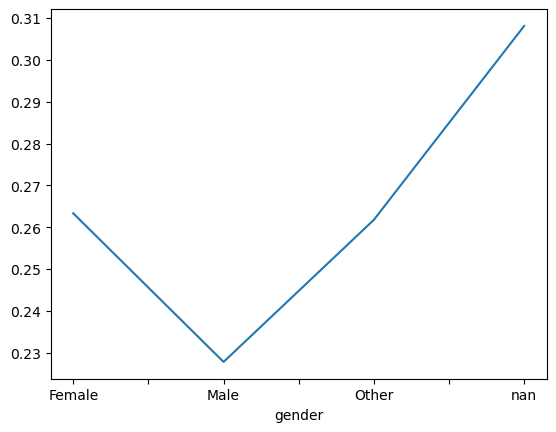

In [55]:
t['mean'].plot()

In [56]:
# можно создать свои кастомные интервалы с помощью cut
# -float('inf') что бы все было включено в интервал
df['city_development_index_group_custom'] = pd.cut(df['city_development_index'], 
                                                   [-float('inf'), 0, 0.1, 0.2, 0.5, float('inf')])
df


,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target,new_col1,new_col2,city_development_index_group,city_development_index_group_custom
0,8949,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,NaN,NaN,1,36,1.0,1,0.025556,"(0.849, 0.949]","(0.5, inf]"
1,29725,city_40,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15,50-99,Pvt Ltd,>4,47,0.0,1,0.016511,"(0.749, 0.849]","(0.5, inf]"
2,11561,city_21,0.624,NaN,No relevent experience,Full time course,Graduate,STEM,5,NaN,NaN,never,83,0.0,1,0.007518,"(0.548, 0.648]","(0.5, inf]"
3,33241,city_115,0.789,NaN,No relevent experience,NaN,Graduate,Business Degree,<1,NaN,Pvt Ltd,never,52,1.0,1,0.015173,"(0.749, 0.849]","(0.5, inf]"
4,666,city_162,0.767,Male,Has relevent experience,no_enrollment,Masters,STEM,>20,50-99,Funded Startup,4,8,0.0,1,0.095875,"(0.749, 0.849]","(0.5, inf]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19153,7386,city_173,0.878,Male,No relevent experience,no_enrollment,Graduate,Humanities,14,NaN,NaN,1,42,1.0,1,0.020905,"(0.849, 0.949]","(0.5, inf]"
19154,31398,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,14,NaN,NaN,4,52,1.0,1,0.017692,"(0.849, 0.949]","(0.5, inf]"
19155,24576,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,50-99,Pvt Ltd,4,44,0.0,1,0.020909,"(0.849, 0.949]","(0.5, inf]"
19156,5756,city_65,0.802,Male,Has relevent experience,no_enrollment,High School,NaN,<1,500-999,Pvt Ltd,2,97,0.0,1,0.008268,"(0.749, 0.849]","(0.5, inf]"


In [57]:
df.groupby('city_development_index_group_custom', dropna=False, observed=False)['target'].agg(['count', 'mean'])


,count,mean
city_development_index_group_custom,,
"(-inf, 0.0]",0,NaN
"(0.0, 0.1]",0,NaN
"(0.1, 0.2]",0,NaN
"(0.2, 0.5]",63,0.587302
"(0.5, inf]",19095,0.248233


# group Categorical variables

In [58]:
df.groupby('education_level', dropna=False)['target'].agg(['count', 'mean'])

,count,mean
education_level,,
Graduate,11598,0.279790
High School,2017,0.195340
Masters,4361,0.214400
Phd,414,0.140097
Primary School,308,0.133117
NaN,460,0.226087


объединение некоторых категорий в одну
не перебирать строки циклом питона! это будет очень медленно и будет выглядеть нелепо
есть несколько способов сделать это по другому


In [59]:
# можно написать функцию и использовать метод aplly к датафрейму(столбцу)

def education_group(x):
    if x in ['High School', 'Primary School']:
        return "School"
    if x in ['Masters', 'Phd']:
        return "Masters_and_phd"
    return x

# применяю к нужному столбцу новую функцию
df['new_education_level'] = df['education_level'].apply(education_group)
df

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target,new_col1,new_col2,city_development_index_group,city_development_index_group_custom,new_education_level
0,8949,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,NaN,NaN,1,36,1.0,1,0.025556,"(0.849, 0.949]","(0.5, inf]",Graduate
1,29725,city_40,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15,50-99,Pvt Ltd,>4,47,0.0,1,0.016511,"(0.749, 0.849]","(0.5, inf]",Graduate
2,11561,city_21,0.624,NaN,No relevent experience,Full time course,Graduate,STEM,5,NaN,NaN,never,83,0.0,1,0.007518,"(0.548, 0.648]","(0.5, inf]",Graduate
3,33241,city_115,0.789,NaN,No relevent experience,NaN,Graduate,Business Degree,<1,NaN,Pvt Ltd,never,52,1.0,1,0.015173,"(0.749, 0.849]","(0.5, inf]",Graduate
4,666,city_162,0.767,Male,Has relevent experience,no_enrollment,Masters,STEM,>20,50-99,Funded Startup,4,8,0.0,1,0.095875,"(0.749, 0.849]","(0.5, inf]",Masters_and_phd
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19153,7386,city_173,0.878,Male,No relevent experience,no_enrollment,Graduate,Humanities,14,NaN,NaN,1,42,1.0,1,0.020905,"(0.849, 0.949]","(0.5, inf]",Graduate
19154,31398,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,14,NaN,NaN,4,52,1.0,1,0.017692,"(0.849, 0.949]","(0.5, inf]",Graduate
19155,24576,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,50-99,Pvt Ltd,4,44,0.0,1,0.020909,"(0.849, 0.949]","(0.5, inf]",Graduate
19156,5756,city_65,0.802,Male,Has relevent experience,no_enrollment,High School,NaN,<1,500-999,Pvt Ltd,2,97,0.0,1,0.008268,"(0.749, 0.849]","(0.5, inf]",School


In [60]:
df.groupby('new_education_level', dropna=False)['target'].agg(['count', 'mean'])

,count,mean
new_education_level,,
Graduate,11598,0.279790
Masters_and_phd,4775,0.207958
School,2325,0.187097
NaN,460,0.226087


In [61]:
# еще можно заменить с помощью replace
df['education_level'].replace("Primary School", "School") 

0           Graduate
1           Graduate
2           Graduate
3           Graduate
4            Masters
            ...     
19153       Graduate
19154       Graduate
19155       Graduate
19156    High School
19157         School
Name: education_level, Length: 19158, dtype: object

In [62]:
# замена и группирока с помощью словаря и функции map
# но нужно тогда прописать для каждой категории. так как если что то будет не указано, то оно станет NaN
d = {"Primary School": "School"}
df['education_level'].map(d)

0           NaN
1           NaN
2           NaN
3           NaN
4           NaN
          ...  
19153       NaN
19154       NaN
19155       NaN
19156       NaN
19157    School
Name: education_level, Length: 19158, dtype: object

# logic with varios columns

In [63]:


df

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target,new_col1,new_col2,city_development_index_group,city_development_index_group_custom,new_education_level
0,8949,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,NaN,NaN,1,36,1.0,1,0.025556,"(0.849, 0.949]","(0.5, inf]",Graduate
1,29725,city_40,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15,50-99,Pvt Ltd,>4,47,0.0,1,0.016511,"(0.749, 0.849]","(0.5, inf]",Graduate
2,11561,city_21,0.624,NaN,No relevent experience,Full time course,Graduate,STEM,5,NaN,NaN,never,83,0.0,1,0.007518,"(0.548, 0.648]","(0.5, inf]",Graduate
3,33241,city_115,0.789,NaN,No relevent experience,NaN,Graduate,Business Degree,<1,NaN,Pvt Ltd,never,52,1.0,1,0.015173,"(0.749, 0.849]","(0.5, inf]",Graduate
4,666,city_162,0.767,Male,Has relevent experience,no_enrollment,Masters,STEM,>20,50-99,Funded Startup,4,8,0.0,1,0.095875,"(0.749, 0.849]","(0.5, inf]",Masters_and_phd
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19153,7386,city_173,0.878,Male,No relevent experience,no_enrollment,Graduate,Humanities,14,NaN,NaN,1,42,1.0,1,0.020905,"(0.849, 0.949]","(0.5, inf]",Graduate
19154,31398,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,14,NaN,NaN,4,52,1.0,1,0.017692,"(0.849, 0.949]","(0.5, inf]",Graduate
19155,24576,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,50-99,Pvt Ltd,4,44,0.0,1,0.020909,"(0.849, 0.949]","(0.5, inf]",Graduate
19156,5756,city_65,0.802,Male,Has relevent experience,no_enrollment,High School,NaN,<1,500-999,Pvt Ltd,2,97,0.0,1,0.008268,"(0.749, 0.849]","(0.5, inf]",School


In [64]:
# функции с несколькими столбцами когда условие для заполнения какого то столбца, требует участие
# другого столбца. Эта функция будет применяться ко всему датафрейму
# например здесь к Phd надо накинуть по 1000 часов обучения(в нашем датафрейме)
# в эту функцию будет заходить сразу целая строка датафрейма
def new_training_hours(row):
    if row['education_level'] == 'Phd':
        return row['training_hours'] + 1000
    return row['training_hours']

In [65]:
df['new_training_hours'] = df.apply(new_training_hours, axis=1) # axis что бы смотреть по строкам

In [66]:
df[df['education_level'] == 'Phd'] # фильтрую что бы посмотреть только Phd

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target,new_col1,new_col2,city_development_index_group,city_development_index_group_custom,new_education_level,new_training_hours
37,10164,city_114,0.926,Male,Has relevent experience,no_enrollment,Phd,STEM,>20,100-500,Pvt Ltd,4,42,1.0,1,0.022048,"(0.849, 0.949]","(0.5, inf]",Masters_and_phd,1042
121,13915,city_16,0.910,Male,Has relevent experience,no_enrollment,Phd,STEM,>20,100-500,Pvt Ltd,2,20,1.0,1,0.045500,"(0.849, 0.949]","(0.5, inf]",Masters_and_phd,1020
130,3921,city_36,0.893,NaN,No relevent experience,no_enrollment,Phd,STEM,>20,1000-4999,Public Sector,>4,4,0.0,1,0.223250,"(0.849, 0.949]","(0.5, inf]",Masters_and_phd,1004
135,23947,city_103,0.920,NaN,No relevent experience,no_enrollment,Phd,STEM,NaN,NaN,NaN,NaN,70,0.0,1,0.013143,"(0.849, 0.949]","(0.5, inf]",Masters_and_phd,1070
152,31786,city_103,0.920,Male,No relevent experience,no_enrollment,Phd,STEM,>20,50-99,Pvt Ltd,>4,14,0.0,1,0.065714,"(0.849, 0.949]","(0.5, inf]",Masters_and_phd,1014
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18738,1477,city_162,0.767,Male,Has relevent experience,no_enrollment,Phd,STEM,>20,10000+,Pvt Ltd,1,34,0.0,1,0.022559,"(0.749, 0.849]","(0.5, inf]",Masters_and_phd,1034
18800,18365,city_103,0.920,Male,Has relevent experience,no_enrollment,Phd,STEM,15,50-99,Funded Startup,4,108,0.0,1,0.008519,"(0.849, 0.949]","(0.5, inf]",Masters_and_phd,1108
18807,229,city_114,0.926,Male,No relevent experience,no_enrollment,Phd,STEM,14,5000-9999,Public Sector,>4,9,1.0,1,0.102889,"(0.849, 0.949]","(0.5, inf]",Masters_and_phd,1009
18944,2678,city_104,0.924,NaN,No relevent experience,no_enrollment,Phd,STEM,>20,50-99,Pvt Ltd,NaN,27,0.0,1,0.034222,"(0.849, 0.949]","(0.5, inf]",Masters_and_phd,1027


# pivot table function

In [67]:
df.groupby('new_education_level', dropna=False)['target'].agg(['count', 'mean'])

,count,mean
new_education_level,,
Graduate,11598,0.279790
Masters_and_phd,4775,0.207958
School,2325,0.187097
NaN,460,0.226087


In [68]:
# index это группировка new_education_level
# values это то на что смотрю. в данном случае target
# aggfunc функции агрегации
df.pivot_table(index="new_education_level", values='target', aggfunc=["count", "mean"] )

,count,mean
,target,target
new_education_level,,
Graduate,11598,0.279790
Masters_and_phd,4775,0.207958
School,2325,0.187097


в таблице так не указан NaN - не показано сколько  NaN. И что бы это отображалось в сводной таблице. нужно заполнить пропуски. например написать там "no info"

In [69]:
df['new_education_level'] = df['new_education_level'].fillna('no_info')

In [70]:
t = df.pivot_table(index="new_education_level", values='target', aggfunc=["count", "mean"] )
t

,count,mean
,target,target
new_education_level,,
Graduate,11598,0.279790
Masters_and_phd,4775,0.207958
School,2325,0.187097
no_info,460,0.226087


еще там проблема в том что там двухэтажные названия у столбцов(мультииндекс)

In [71]:
t.reset_index()

,new_education_level,count,mean
,,target,target
0,Graduate,11598,0.279790
1,Masters_and_phd,4775,0.207958
2,School,2325,0.187097
3,no_info,460,0.226087


In [72]:
# код со stackoverflow гуглился по запросу pandas flatten multiindex
# https://stackoverflow.com/questions/14507794/how-to-flatten-a-hierarchical-index-in-columns
t.columns = ['_'.join(col).strip() for col in t.columns.values]


In [73]:
t = t.reset_index()
t

,new_education_level,count_target,mean_target
0,Graduate,11598,0.279790
1,Masters_and_phd,4775,0.207958
2,School,2325,0.187097
3,no_info,460,0.226087


In [74]:
df.pivot_table(index="new_education_level", values='target', aggfunc=["count", "mean"] )

,count,mean
,target,target
new_education_level,,
Graduate,11598,0.279790
Masters_and_phd,4775,0.207958
School,2325,0.187097
no_info,460,0.226087


In [75]:
# pivot_table позволяет добавить доп группировку. в том случае например еще и по полу. надо добавить columns=
df.pivot_table(index="new_education_level",columns="gender", values='target', aggfunc=["count", "mean"] )

count                  mean                    
gender              Female  Male Other    Female      Male     Other
new_education_level                                                 
Graduate               773  8144   112  0.279431  0.257122  0.330357
Masters_and_phd        386  3237    31  0.233161  0.186284  0.096774
School                  71  1598    39  0.267606  0.171464  0.205128
no_info                  8   242     9  0.125000  0.169421  0.222222

In [76]:
df.groupby(['new_education_level', 'gender'], dropna=False)['target'].agg(['count', 'mean'])

count      mean
new_education_level gender                 
Graduate            Female    773  0.279431
                    Male     8144  0.257122
                    Other     112  0.330357
                    NaN      2569  0.349552
Masters_and_phd     Female    386  0.233161
                    Male     3237  0.186284
                    Other      31  0.096774
                    NaN      1121  0.264942
School              Female     71  0.267606
                    Male     1598  0.171464
                    Other      39  0.205128
                    NaN       617  0.217180
no_info             Female      8  0.125000
                    Male      242  0.169421
                    Other       9  0.222222
                    NaN       201  0.298507

In [77]:
# groupby тоже может сделать мультииндекс. лечится так же.вот например с мультииндексом
t = (df.groupby(['new_education_level', 'gender'], dropna=False)
     [['target', 'city_development_index']]
     .agg(['count', 'mean']).reset_index())

In [78]:
t

new_education_level  gender target           city_development_index  \
                                count      mean                  count   
0             Graduate  Female    773  0.279431                    773   
1             Graduate    Male   8144  0.257122                   8144   
2             Graduate   Other    112  0.330357                    112   
3             Graduate     NaN   2569  0.349552                   2569   
4      Masters_and_phd  Female    386  0.233161                    386   
5      Masters_and_phd    Male   3237  0.186284                   3237   
6      Masters_and_phd   Other     31  0.096774                     31   
7      Masters_and_phd     NaN   1121  0.264942                   1121   
8               School  Female     71  0.267606                     71   
9               School    Male   1598  0.171464                   1598   
10              School   Other     39  0.205128                     39   
11              School     NaN    617  0.217180                    617   
12             no_info  Female      8  0.125000                      8   
13             no_info    Male    242  0.169421                    242   
14             no_info   Other      9  0.222222                      9   
15             no_info     NaN    201  0.298507                    201   

              
        mean  
0   0.844373  
1   0.834135  
2   0.870518  
3   0.782499  
4   0.849104  
5   0.849820  
6   0.864419  
7   0.807971  
8   0.831761  
9   0.843674  
10  0.869256  
11  0.814810  
12  0.784875  
13  0.830000  
14  0.806889  
15  0.776090

In [79]:
# код со stackoverflow гуглился по запросу pandas flatten multiindex
# https://stackoverflow.com/questions/14507794/how-to-flatten-a-hierarchical-index-in-columns
t.columns = ['_'.join(col).strip() for col in t.columns.values]

In [80]:
t

,new_education_level_,gender_,target_count,target_mean,city_development_index_count,city_development_index_mean
0,Graduate,Female,773,0.279431,773,0.844373
1,Graduate,Male,8144,0.257122,8144,0.834135
2,Graduate,Other,112,0.330357,112,0.870518
3,Graduate,NaN,2569,0.349552,2569,0.782499
4,Masters_and_phd,Female,386,0.233161,386,0.849104
5,Masters_and_phd,Male,3237,0.186284,3237,0.849820
6,Masters_and_phd,Other,31,0.096774,31,0.864419
7,Masters_and_phd,NaN,1121,0.264942,1121,0.807971
8,School,Female,71,0.267606,71,0.831761
9,School,Male,1598,0.171464,1598,0.843674


## heatmap

In [81]:
df['gender'] = df['gender'].fillna('no_info')
t = df.pivot_table(index="new_education_level",columns="gender", values='target', aggfunc=["mean"] )
t

mean                              
gender                 Female      Male     Other   no_info
new_education_level                                        
Graduate             0.279431  0.257122  0.330357  0.349552
Masters_and_phd      0.233161  0.186284  0.096774  0.264942
School               0.267606  0.171464  0.205128  0.217180
no_info              0.125000  0.169421  0.222222  0.298507

heatmap что бы лечге было понять где какие значения больше

<Axes: xlabel='None-gender', ylabel='new_education_level'>

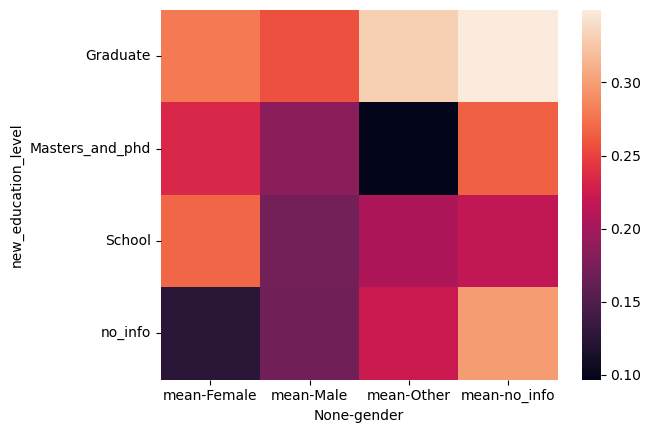

In [82]:
import seaborn as sns
sns.heatmap(t)

следить за count так как там может быть какая то случайность а не закономерность

In [83]:
df.pivot_table(index="new_education_level",columns="gender", values='target', aggfunc=["count"] )

count                    
gender              Female  Male Other no_info
new_education_level                           
Graduate               773  8144   112    2569
Masters_and_phd        386  3237    31    1121
School                  71  1598    39     617
no_info                  8   242     9     201

# Correlation and phik

корреляции это взаимосвязь между двумя переменными, показывающая, как изменения одной переменной связаны с изменениями другой.ЛИНЕЙНО

одна идет вверх, другая идет вверх. одна идет вниз другая идет вниз. итд

In [84]:
df.columns

Index(['enrollee_id', 'city', 'city_development_index', 'gender',
       'relevent_experience', 'enrolled_university', 'education_level',
       'major_discipline', 'experience', 'company_size', 'company_type',
       'last_new_job', 'training_hours', 'target', 'new_col1', 'new_col2',
       'city_development_index_group', 'city_development_index_group_custom',
       'new_education_level', 'new_training_hours'],
      dtype='object')

In [85]:
df.corr(numeric_only=True)

,enrollee_id,city_development_index,training_hours,target,new_col1,new_col2,new_training_hours
enrollee_id,1.000000,-0.040455,0.000998,0.049475,NaN,-0.006872,-0.027681
city_development_index,-0.040455,1.000000,0.001920,-0.341665,NaN,0.086401,0.060995
training_hours,0.000998,0.001920,1.000000,-0.021577,NaN,-0.439789,0.385957
target,0.049475,-0.341665,-0.021577,1.000000,NaN,-0.033012,-0.042844
new_col1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
new_col2,-0.006872,0.086401,-0.439789,-0.033012,NaN,1.000000,-0.163002
new_training_hours,-0.027681,0.060995,0.385957,-0.042844,NaN,-0.163002,1.000000


In [86]:
numeric_df = df.select_dtypes(include=[float, int])
numeric_df.corr()


,enrollee_id,city_development_index,training_hours,target,new_col1,new_col2,new_training_hours
enrollee_id,1.000000,-0.040455,0.000998,0.049475,NaN,-0.006872,-0.027681
city_development_index,-0.040455,1.000000,0.001920,-0.341665,NaN,0.086401,0.060995
training_hours,0.000998,0.001920,1.000000,-0.021577,NaN,-0.439789,0.385957
target,0.049475,-0.341665,-0.021577,1.000000,NaN,-0.033012,-0.042844
new_col1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
new_col2,-0.006872,0.086401,-0.439789,-0.033012,NaN,1.000000,-0.163002
new_training_hours,-0.027681,0.060995,0.385957,-0.042844,NaN,-0.163002,1.000000


<Axes: >

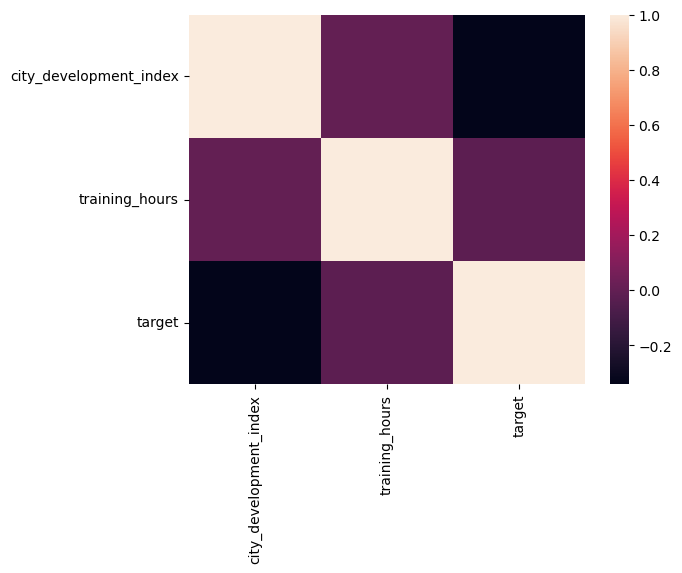

In [87]:
sns.heatmap(df[['city_development_index', 'training_hours', 'target']].corr(numeric_only=True))

In [88]:
df[['city_development_index', 'training_hours', 'target']].corr(numeric_only=True)

,city_development_index,training_hours,target
city_development_index,1.000000,0.001920,-0.341665
training_hours,0.001920,1.000000,-0.021577
target,-0.341665,-0.021577,1.000000


phik подойдет для разведывательного анализа данных будет показывать не линейные связи

In [89]:
#! pip install phik

In [90]:
import phik 
from phik.report import plot_correlation_matrix
from phik import report

In [91]:
phik_overwiev = df.phik_matrix()
phik_overwiev

interval columns not set, guessing: ['enrollee_id', 'city_development_index', 'training_hours', 'target', 'new_col1', 'new_col2', 'new_training_hours']


/home/alekspy/anaconda3/lib/python3.11/site-packages/phik/data_quality.py:72: UserWarning: Not enough unique value for variable new_col1 for analysis 1. Dropping this column
  warnings.warn(


,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target,new_col2,city_development_index_group,city_development_index_group_custom,new_education_level,new_training_hours
enrollee_id,1.000000,0.214019,0.125181,0.125045,0.073145,0.051188,0.076123,0.030968,0.086949,0.032956,0.022543,0.045252,0.021517,0.067472,0.007511,0.118153,0.038811,0.051291,0.033738
city,0.214019,1.000000,1.000000,0.235773,0.152621,0.376293,0.363706,0.178508,0.346552,0.249869,0.224174,0.240315,0.075165,0.477283,0.107558,1.000000,0.797284,0.381579,0.121074
city_development_index,0.125181,1.000000,1.000000,0.163535,0.101448,0.245979,0.224368,0.129083,0.307770,0.130592,0.112234,0.172067,0.000000,0.482287,0.052153,1.000000,0.837862,0.174978,0.062888
gender,0.125045,0.235773,0.163535,1.000000,0.175232,0.081010,0.051922,0.087460,0.202654,0.036975,0.073239,0.093596,0.009124,0.116653,0.000000,0.114481,0.034018,0.151330,0.024818
relevent_experience,0.073145,0.152621,0.101448,0.175232,1.000000,0.237586,0.259716,0.098661,0.500107,0.074259,0.284810,0.539529,0.020727,0.199859,0.000000,0.059986,0.026304,0.466830,0.039599
enrolled_university,0.051188,0.376293,0.245979,0.081010,0.237586,1.000000,0.215062,0.151561,0.434500,0.067175,0.231786,0.430596,0.000000,0.093803,0.000000,0.174196,0.027827,0.153905,0.101667
education_level,0.076123,0.363706,0.224368,0.051922,0.259716,0.215062,1.000000,0.104318,0.302908,0.082131,0.116321,0.253235,0.030104,0.075999,0.029732,0.127624,0.034684,1.000000,0.639933
major_discipline,0.030968,0.178508,0.129083,0.087460,0.098661,0.151561,0.104318,1.000000,0.116505,0.038923,0.089031,0.047317,0.000000,0.029200,0.020992,0.101880,0.028407,0.084839,0.020618
experience,0.086949,0.346552,0.307770,0.202654,0.500107,0.434500,0.302908,0.116505,1.000000,0.127647,0.112121,0.468247,0.000000,0.238725,0.000000,0.335891,0.040510,0.308699,0.148504
company_size,0.032956,0.249869,0.130592,0.036975,0.074259,0.067175,0.082131,0.038923,0.127647,1.000000,0.332074,0.102736,0.000000,0.071953,0.011328,0.095912,0.011386,0.125750,0.041586


<Axes: >

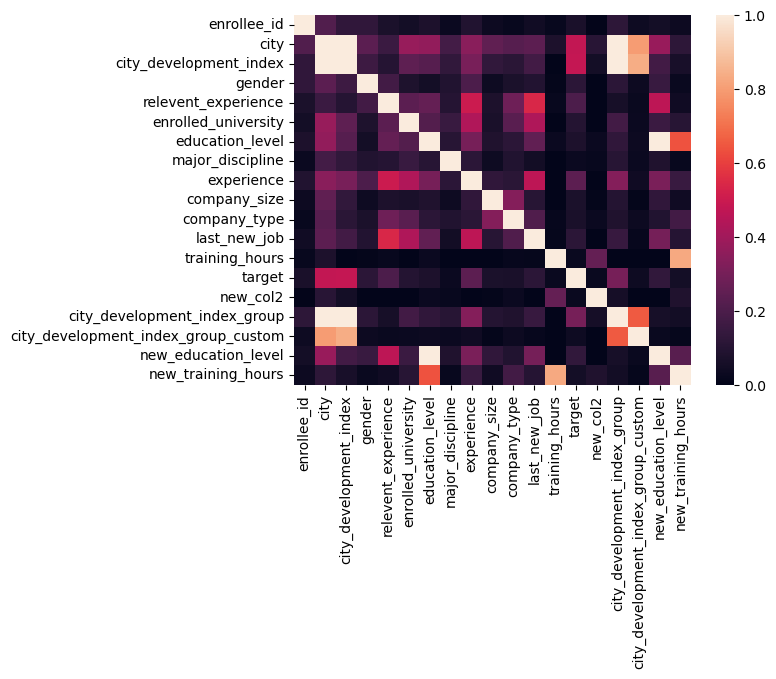

In [92]:
sns.heatmap(phik_overwiev)

In [93]:
# как связан например (линейно и нелинейно) напрмер target с другими переменными
phik_overwiev['target'].sort_values(ascending=False) 

target                                 1.000000
city_development_index                 0.482287
city                                   0.477283
city_development_index_group           0.302403
experience                             0.238725
relevent_experience                    0.199859
new_education_level                    0.132478
gender                                 0.116653
last_new_job                           0.114708
enrolled_university                    0.093803
education_level                        0.075999
company_size                           0.071953
enrollee_id                            0.067472
company_type                           0.066792
new_training_hours                     0.054314
city_development_index_group_custom    0.035805
major_discipline                       0.029200
training_hours                         0.026849
new_col2                               0.026651
Name: target, dtype: float64

# есть ли связь вообще

In [97]:
df['city_development_index_group_q']

0         (0.878, 0.92]
1        (0.691, 0.878]
2        (0.447, 0.691]
3        (0.691, 0.878]
4        (0.691, 0.878]
              ...      
19153    (0.691, 0.878]
19154     (0.878, 0.92]
19155     (0.878, 0.92]
19156    (0.691, 0.878]
19157    (0.691, 0.878]
Name: city_development_index_group_q, Length: 19158, dtype: category
Categories (4, interval[float64, right]): [(0.447, 0.691] < (0.691, 0.878] < (0.878, 0.92] < (0.92, 0.949]]

In [99]:
df.groupby('city_development_index_group_q', observed=False)['target'].agg(['count', 'mean'])

,count,mean
city_development_index_group_q,,
"(0.447, 0.691]",3869,0.550530
"(0.691, 0.878]",3827,0.206428
"(0.878, 0.92]",8925,0.178375
"(0.92, 0.949]",2537,0.104454


In [101]:
t = df.groupby('city', observed=False)['target'].agg(['count', 'mean'])

<Axes: xlabel='city'>

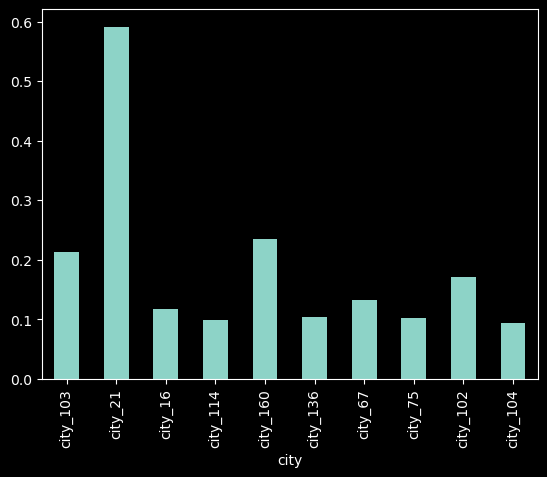

In [107]:
# топ 10 городов где хотят поменять работу
t.sort_values('count', ascending=False).head(10)['mean'].plot(kind='bar')

In [111]:
t = df.groupby('city', observed=False)[['target', 'city_development_index']].agg(['count', 'mean'])
t.columns = ['_'.join(col).strip() for col in t.columns.values] # убираю мультииндекс

In [114]:
t

,target_count,target_mean,city_development_index_count,city_development_index_mean
city,,,,
city_1,26,0.115385,26,0.847
city_10,86,0.104651,86,0.895
city_100,275,0.236364,275,0.887
city_101,75,0.573333,75,0.558
city_102,304,0.171053,304,0.804
...,...,...,...,...
city_93,26,0.192308,26,0.865
city_94,26,0.384615,26,0.698
city_97,104,0.076923,104,0.925


In [121]:
# будет видно что в city_21 большой процент сменить работу и там уровень развитости города низкий
t.sort_values('target_count', ascending=False).head(10) 

,target_count,target_mean,city_development_index_count,city_development_index_mean
city,,,,
city_103,4355,0.213088,4355,0.920
city_21,2702,0.591044,2702,0.624
city_16,1533,0.116765,1533,0.910
city_114,1336,0.099551,1336,0.926
city_160,845,0.235503,845,0.920
city_136,586,0.104096,586,0.897
city_67,431,0.132251,431,0.855
city_75,305,0.101639,305,0.939
city_102,304,0.171053,304,0.804


In [126]:
df['experience_int'] = df['experience'].replace('<1', '0').replace('>20', '999').fillna(-1).astype(int)

In [130]:
df['education_group'] = pd.qcut(df['experience_int'], 5) # делю на 5 категорий годы опыта

чем меньше у человека опыта. тем больше его желание сменить работу

In [131]:
df.groupby('education_group', observed=False)['target'].agg(['count', 'mean'])

,count,mean
education_group,,
"(-1.001, 4.0]",5020,0.358964
"(4.0, 6.0]",2646,0.285336
"(6.0, 11.0]",4459,0.239740
"(11.0, 18.0]",3295,0.170561
"(18.0, 999.0]",3738,0.157571


<Axes: xlabel='education_group'>

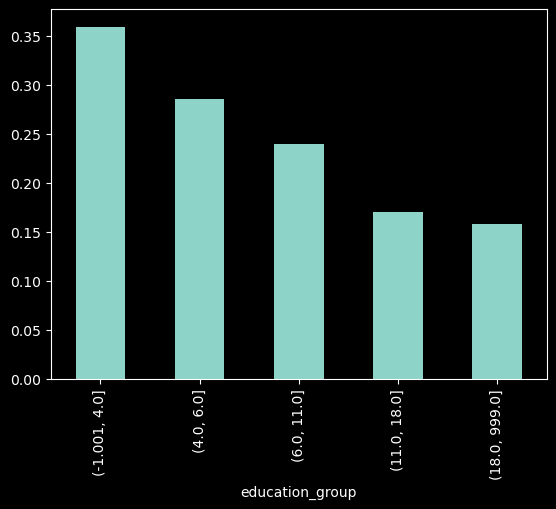

In [132]:
df.groupby('education_group', observed=False)['target'].mean().plot(kind='bar')

# play data

игрушечные данные. что бы проверить какую то идею или функцию.
что бы попробовать. что бы посмотреть что будет

In [137]:
t = pd.DataFrame({'col1': [1,2,3, float('nan')], 
                  'col2': ['a', 'b', 'c', 'd'],
                 'col3': [0]*3 + [1]*1,
                 'col4': [0,0,0,1]})
t

,col1,col2,col3,col4
0,1.0,a,0,0
1,2.0,b,0,0
2,3.0,c,0,0
3,NaN,d,1,1


# функции агрегации

In [139]:
# как работают с пропусками функции  агрегации
t = pd.DataFrame({'col1': [1,2,3, float('nan')]})
t

,col1
0,1.0
1,2.0
2,3.0
3,NaN


In [141]:
t['col1'].sum() # просумировались все элементы которые есть.

6.0

In [142]:
t['col1'].mean()

2.0

In [143]:
t['col1'].count()

3

In [144]:
len(t)

4

# data visualisation

<Axes: >

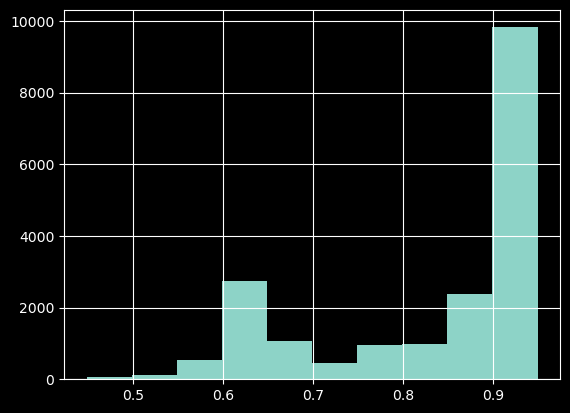

In [147]:
df['city_development_index'].hist()

In [148]:
df['gender'].value_counts()

gender
Male       13221
no_info     4508
Female      1238
Other        191
Name: count, dtype: int64

<Axes: >

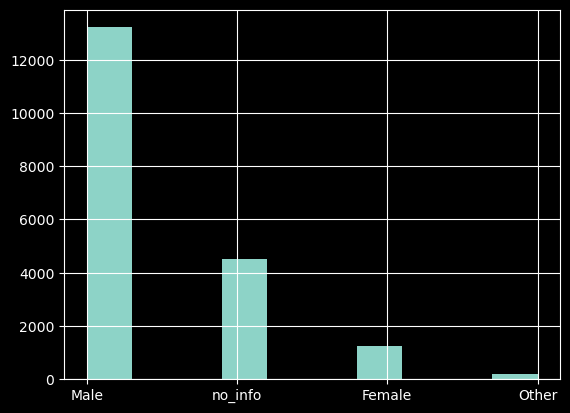

In [149]:
df['gender'].hist()

<Axes: >

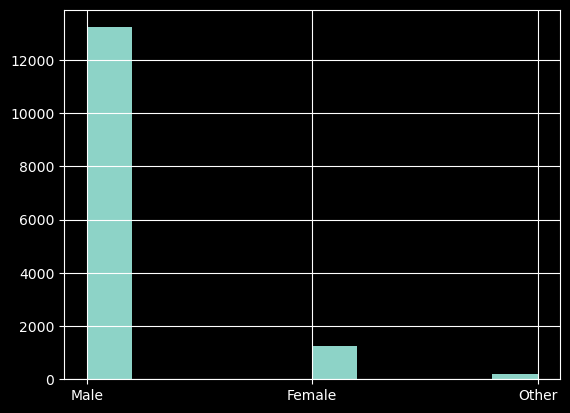

In [151]:
df['gender'] = df['gender'].replace('no_info', float('nan')) 
df['gender'].hist() # пропуски не учитывает

In [153]:
df['gender'].value_counts() # пропуски не учитывает

gender
Male      13221
Female     1238
Other       191
Name: count, dtype: int64

<Axes: xlabel='gender'>

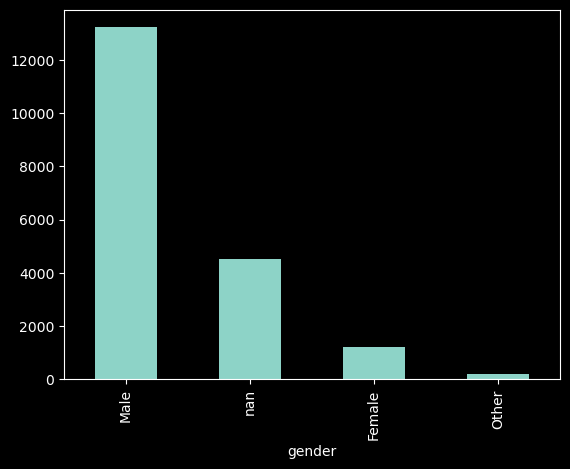

In [158]:
# добавляю dropna=False или заменяю NaN в реплейсе что бы посмотреть с пропусками
df['gender'].value_counts(dropna=False).plot(kind='bar')

# Scatter

In [163]:
# диаграма разброс. позволяет посмотерть взаимосвязь между двумя переменных. 
# построить точки в координатах двух переменных

t = pd.DataFrame({
    'x': [1,2,3],
    'y': [1,3,2]
})
t

,x,y
0,1,1
1,2,3
2,3,2


<Axes: xlabel='x', ylabel='y'>

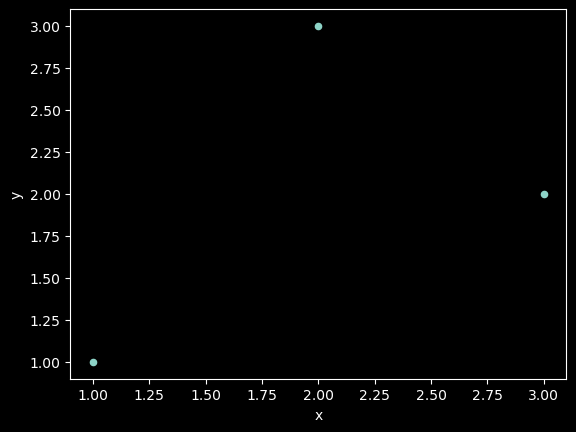

In [166]:
t.plot(x='x', y='y', kind='scatter')

In [167]:
df

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,...,target,new_col1,new_col2,city_development_index_group,city_development_index_group_custom,new_education_level,new_training_hours,city_development_index_group_q,experience_int,education_group
0,8949,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,NaN,...,1.0,1,0.025556,"(0.849, 0.949]","(0.5, inf]",Graduate,36,"(0.878, 0.92]",999,"(18.0, 999.0]"
1,29725,city_40,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15,50-99,...,0.0,1,0.016511,"(0.749, 0.849]","(0.5, inf]",Graduate,47,"(0.691, 0.878]",15,"(11.0, 18.0]"
2,11561,city_21,0.624,NaN,No relevent experience,Full time course,Graduate,STEM,5,NaN,...,0.0,1,0.007518,"(0.548, 0.648]","(0.5, inf]",Graduate,83,"(0.447, 0.691]",5,"(4.0, 6.0]"
3,33241,city_115,0.789,NaN,No relevent experience,NaN,Graduate,Business Degree,<1,NaN,...,1.0,1,0.015173,"(0.749, 0.849]","(0.5, inf]",Graduate,52,"(0.691, 0.878]",0,"(-1.001, 4.0]"
4,666,city_162,0.767,Male,Has relevent experience,no_enrollment,Masters,STEM,>20,50-99,...,0.0,1,0.095875,"(0.749, 0.849]","(0.5, inf]",Masters_and_phd,8,"(0.691, 0.878]",999,"(18.0, 999.0]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19153,7386,city_173,0.878,Male,No relevent experience,no_enrollment,Graduate,Humanities,14,NaN,...,1.0,1,0.020905,"(0.849, 0.949]","(0.5, inf]",Graduate,42,"(0.691, 0.878]",14,"(11.0, 18.0]"
19154,31398,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,14,NaN,...,1.0,1,0.017692,"(0.849, 0.949]","(0.5, inf]",Graduate,52,"(0.878, 0.92]",14,"(11.0, 18.0]"
19155,24576,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,50-99,...,0.0,1,0.020909,"(0.849, 0.949]","(0.5, inf]",Graduate,44,"(0.878, 0.92]",999,"(18.0, 999.0]"
19156,5756,city_65,0.802,Male,Has relevent experience,no_enrollment,High School,NaN,<1,500-999,...,0.0,1,0.008268,"(0.749, 0.849]","(0.5, inf]",School,97,"(0.691, 0.878]",0,"(-1.001, 4.0]"


<Axes: xlabel='city_development_index', ylabel='experience_int'>

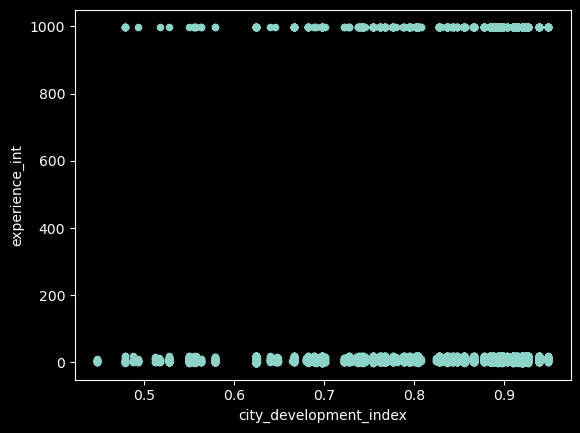

In [171]:
# будет не очень понятно. так как раньше я заполнил значения которые больше 20 на 999
df.plot(x='city_development_index', y='experience_int', kind='scatter')

<Axes: xlabel='city_development_index', ylabel='experience_int'>

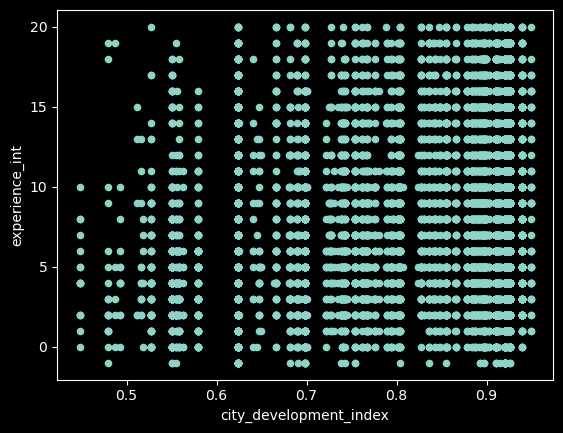

In [172]:
# лучше. но точки немного себя перекрывают
df[df['experience_int'] < 999].plot(x='city_development_index', y='experience_int', kind='scatter')

<Axes: xlabel='city_development_index', ylabel='experience_int'>

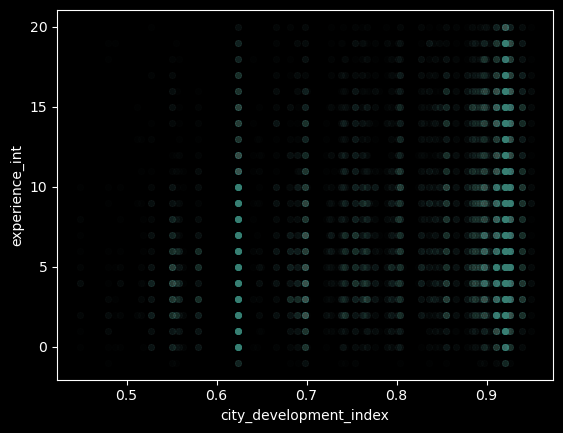

In [176]:
# alpha=0.01 что бы размазывало точки
df[df['experience_int'] < 999].plot(x='city_development_index', y='experience_int', kind='scatter', alpha=0.01)

In [180]:
# надо проверить с помощью сводной таблицы
# 
#
#
(df[df['experience_int'] < 999]
 .groupby('city_development_index_group_q')
 ['experience_int'].agg(['count', 'mean', 'median']))

/tmp/ipykernel_8075/2929793684.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  .groupby('city_development_index_group_q')


,count,mean,median
city_development_index_group_q,,,
"(0.447, 0.691]",3768,5.603238,5.0
"(0.691, 0.878]",3408,7.936620,7.0
"(0.878, 0.92]",6733,8.576860,8.0
"(0.92, 0.949]",1963,9.099338,9.0


<Axes: xlabel='city_development_index_group_q'>

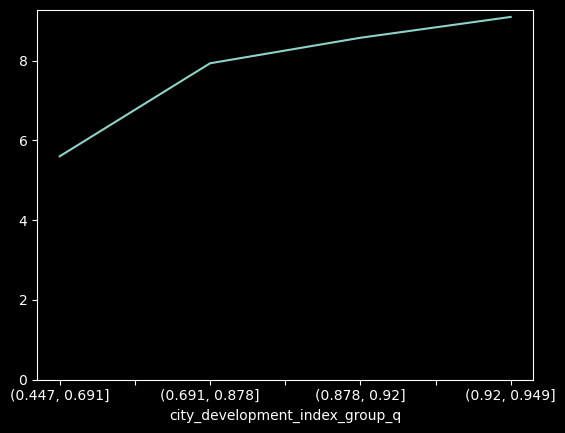

In [184]:
(df[df['experience_int'] < 999]
 .groupby('city_development_index_group_q', observed=False)
 ['experience_int'].mean()).plot(ylim=0)


# join s

In [185]:
df

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,...,target,new_col1,new_col2,city_development_index_group,city_development_index_group_custom,new_education_level,new_training_hours,city_development_index_group_q,experience_int,education_group
0,8949,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,NaN,...,1.0,1,0.025556,"(0.849, 0.949]","(0.5, inf]",Graduate,36,"(0.878, 0.92]",999,"(18.0, 999.0]"
1,29725,city_40,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15,50-99,...,0.0,1,0.016511,"(0.749, 0.849]","(0.5, inf]",Graduate,47,"(0.691, 0.878]",15,"(11.0, 18.0]"
2,11561,city_21,0.624,NaN,No relevent experience,Full time course,Graduate,STEM,5,NaN,...,0.0,1,0.007518,"(0.548, 0.648]","(0.5, inf]",Graduate,83,"(0.447, 0.691]",5,"(4.0, 6.0]"
3,33241,city_115,0.789,NaN,No relevent experience,NaN,Graduate,Business Degree,<1,NaN,...,1.0,1,0.015173,"(0.749, 0.849]","(0.5, inf]",Graduate,52,"(0.691, 0.878]",0,"(-1.001, 4.0]"
4,666,city_162,0.767,Male,Has relevent experience,no_enrollment,Masters,STEM,>20,50-99,...,0.0,1,0.095875,"(0.749, 0.849]","(0.5, inf]",Masters_and_phd,8,"(0.691, 0.878]",999,"(18.0, 999.0]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19153,7386,city_173,0.878,Male,No relevent experience,no_enrollment,Graduate,Humanities,14,NaN,...,1.0,1,0.020905,"(0.849, 0.949]","(0.5, inf]",Graduate,42,"(0.691, 0.878]",14,"(11.0, 18.0]"
19154,31398,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,14,NaN,...,1.0,1,0.017692,"(0.849, 0.949]","(0.5, inf]",Graduate,52,"(0.878, 0.92]",14,"(11.0, 18.0]"
19155,24576,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,50-99,...,0.0,1,0.020909,"(0.849, 0.949]","(0.5, inf]",Graduate,44,"(0.878, 0.92]",999,"(18.0, 999.0]"
19156,5756,city_65,0.802,Male,Has relevent experience,no_enrollment,High School,NaN,<1,500-999,...,0.0,1,0.008268,"(0.749, 0.849]","(0.5, inf]",School,97,"(0.691, 0.878]",0,"(-1.001, 4.0]"


In [187]:
age = df[['enrollee_id']].copy() # чисто тестовая таблица для практики джойнов

In [188]:
age['age'] = 30 # просто возраст у всех 30

In [189]:
age

,enrollee_id,age
0,8949,30
1,29725,30
2,11561,30
3,33241,30
4,666,30
...,...,...
19153,7386,30
19154,31398,30
19155,24576,30
19156,5756,30


In [197]:
# когда что то подтянуть к онсовной таблицы, то левый джойн
# сохранить все строки из левой таблицы. в данном случае df
# по какому ключю джойним в on=. 
# если названия столбцов отличаются. то есть методы left_on right_on
df = df.merge(age, how='left', on='enrollee_id')
df

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,...,city_development_index_group,city_development_index_group_custom,new_education_level,new_training_hours,city_development_index_group_q,experience_int,education_group,age_x,age_y,age
0,8949,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,NaN,...,"(0.849, 0.949]","(0.5, inf]",Graduate,36,"(0.878, 0.92]",999,"(18.0, 999.0]",30,30,30
1,29725,city_40,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15,50-99,...,"(0.749, 0.849]","(0.5, inf]",Graduate,47,"(0.691, 0.878]",15,"(11.0, 18.0]",30,30,30
2,11561,city_21,0.624,NaN,No relevent experience,Full time course,Graduate,STEM,5,NaN,...,"(0.548, 0.648]","(0.5, inf]",Graduate,83,"(0.447, 0.691]",5,"(4.0, 6.0]",30,30,30
3,33241,city_115,0.789,NaN,No relevent experience,NaN,Graduate,Business Degree,<1,NaN,...,"(0.749, 0.849]","(0.5, inf]",Graduate,52,"(0.691, 0.878]",0,"(-1.001, 4.0]",30,30,30
4,666,city_162,0.767,Male,Has relevent experience,no_enrollment,Masters,STEM,>20,50-99,...,"(0.749, 0.849]","(0.5, inf]",Masters_and_phd,8,"(0.691, 0.878]",999,"(18.0, 999.0]",30,30,30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19153,7386,city_173,0.878,Male,No relevent experience,no_enrollment,Graduate,Humanities,14,NaN,...,"(0.849, 0.949]","(0.5, inf]",Graduate,42,"(0.691, 0.878]",14,"(11.0, 18.0]",30,30,30
19154,31398,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,14,NaN,...,"(0.849, 0.949]","(0.5, inf]",Graduate,52,"(0.878, 0.92]",14,"(11.0, 18.0]",30,30,30
19155,24576,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,50-99,...,"(0.849, 0.949]","(0.5, inf]",Graduate,44,"(0.878, 0.92]",999,"(18.0, 999.0]",30,30,30
19156,5756,city_65,0.802,Male,Has relevent experience,no_enrollment,High School,NaN,<1,500-999,...,"(0.749, 0.849]","(0.5, inf]",School,97,"(0.691, 0.878]",0,"(-1.001, 4.0]",30,30,30


In [193]:
# после джойна надо посмотреть не появлились ли дубликаты
len(df)

19158

In [194]:
len(age)

19158

In [195]:
len(age['enrollee_id'].drop_duplicates())

19158

в пандас есть еще метод джоин. но тогда надо перевести нужные переменные в индексы
типа так

df.set_index("enrollee_id")

и тогда можно не писать по какому кключу нужно джойнить

In [196]:
df.set_index("enrollee_id")

,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,...,new_col2,city_development_index_group,city_development_index_group_custom,new_education_level,new_training_hours,city_development_index_group_q,experience_int,education_group,age_x,age_y
enrollee_id,,,,,,,,,,,,,,,,,,,,,
8949,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,NaN,NaN,...,0.025556,"(0.849, 0.949]","(0.5, inf]",Graduate,36,"(0.878, 0.92]",999,"(18.0, 999.0]",30,30
29725,city_40,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15,50-99,Pvt Ltd,...,0.016511,"(0.749, 0.849]","(0.5, inf]",Graduate,47,"(0.691, 0.878]",15,"(11.0, 18.0]",30,30
11561,city_21,0.624,NaN,No relevent experience,Full time course,Graduate,STEM,5,NaN,NaN,...,0.007518,"(0.548, 0.648]","(0.5, inf]",Graduate,83,"(0.447, 0.691]",5,"(4.0, 6.0]",30,30
33241,city_115,0.789,NaN,No relevent experience,NaN,Graduate,Business Degree,<1,NaN,Pvt Ltd,...,0.015173,"(0.749, 0.849]","(0.5, inf]",Graduate,52,"(0.691, 0.878]",0,"(-1.001, 4.0]",30,30
666,city_162,0.767,Male,Has relevent experience,no_enrollment,Masters,STEM,>20,50-99,Funded Startup,...,0.095875,"(0.749, 0.849]","(0.5, inf]",Masters_and_phd,8,"(0.691, 0.878]",999,"(18.0, 999.0]",30,30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7386,city_173,0.878,Male,No relevent experience,no_enrollment,Graduate,Humanities,14,NaN,NaN,...,0.020905,"(0.849, 0.949]","(0.5, inf]",Graduate,42,"(0.691, 0.878]",14,"(11.0, 18.0]",30,30
31398,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,14,NaN,NaN,...,0.017692,"(0.849, 0.949]","(0.5, inf]",Graduate,52,"(0.878, 0.92]",14,"(11.0, 18.0]",30,30
24576,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,50-99,Pvt Ltd,...,0.020909,"(0.849, 0.949]","(0.5, inf]",Graduate,44,"(0.878, 0.92]",999,"(18.0, 999.0]",30,30


In [199]:
# если перед джойном я вижу что например айдишки в age дублируются
# например для одного айди есть возраст 30 и 35 например. то можно выбрать заранее какой брать
# например минимальный
age.groupby('enrollee_id')['age'].min()

enrollee_id
1        30
2        30
4        30
5        30
7        30
         ..
33375    30
33376    30
33377    30
33379    30
33380    30
Name: age, Length: 19158, dtype: int64

# Numpy

под капотом у пандас numpy

In [203]:
type(df['city_development_index'].values)

numpy.ndarray

In [209]:
import numpy as np

# часто можно брать из нумпай например среднее для питона. так же там крутой модуль рандом


In [210]:
np.mean([1,2,1,5,3])

2.4

In [220]:
np.random.normal() # например нормальное распределение. ну или другие

-1.150903479702816

In [224]:
list(range(-10,10, 0.5))

TypeError: 'float' object cannot be interpreted as an integer

In [225]:
np.linspace(-10, 10, 100)

array([-10.        ,  -9.7979798 ,  -9.5959596 ,  -9.39393939,
        -9.19191919,  -8.98989899,  -8.78787879,  -8.58585859,
        -8.38383838,  -8.18181818,  -7.97979798,  -7.77777778,
        -7.57575758,  -7.37373737,  -7.17171717,  -6.96969697,
        -6.76767677,  -6.56565657,  -6.36363636,  -6.16161616,
        -5.95959596,  -5.75757576,  -5.55555556,  -5.35353535,
        -5.15151515,  -4.94949495,  -4.74747475,  -4.54545455,
        -4.34343434,  -4.14141414,  -3.93939394,  -3.73737374,
        -3.53535354,  -3.33333333,  -3.13131313,  -2.92929293,
        -2.72727273,  -2.52525253,  -2.32323232,  -2.12121212,
        -1.91919192,  -1.71717172,  -1.51515152,  -1.31313131,
        -1.11111111,  -0.90909091,  -0.70707071,  -0.50505051,
        -0.3030303 ,  -0.1010101 ,   0.1010101 ,   0.3030303 ,
         0.50505051,   0.70707071,   0.90909091,   1.11111111,
         1.31313131,   1.51515152,   1.71717172,   1.91919192,
         2.12121212,   2.32323232,   2.52525253,   2.72

In [229]:
np.random.uniform() # сгенерировать шум| случайно значение от 0 до 1

0.9895907216688117

In [230]:
np.random.uniform(size=10)

array([0.22299354, 0.69202213, 0.68881282, 0.26717495, 0.29397566,
       0.55061444, 0.00476596, 0.88924489, 0.26366883, 0.8780364 ])

In [231]:
a = [1,2,3]
b = [2,2,2]
a+b

[1, 2, 3, 2, 2, 2]

In [232]:
a = np.array([1,2,3])
b = np.array([2,2,2])
a+b

array([3, 4, 5])